---
# Bike Rental Demand Prediction using Linear Regression
---

# Problem Statement
BoomBikes, a US bike-sharing provider, is facing revenue challenges due to the ongoing COVID-19 pandemic. To recover and thrive in the post-pandemic economy, the company seeks to understand the factors influencing the demand for shared bikes. They have collected a comprehensive dataset on daily bike rentals across the American market and wish to build a predictive model to identify significant variables affecting bike demand.


## Introduction

This notebook focuses on building a multiple linear regression model to predict the demand for shared bikes using a dataset provided by BoomBikes, a US-based bike-sharing company. 
BoomBikes, like many businesses, has experienced a significant drop in revenue due to the ongoing COVID-19 pandemic, and is now looking to strategize for recovery.
Understanding the factors that influence bike rental demand will be crucial for the company to optimize their operations and prepare for a resurgence in demand post-pandemic.

## The dataset, `day.csv`, contains daily bike rental data across the American market. It includes features such as:
  - **Time variables**: Date, season, year, month, day of the week.
  - **Weather variables**: Temperature, feeling temperature, humidity, windspeed, and weather condition.
  - **Other variables**: Holiday indicator, working day indicator.
  - **Target variable**: The total number of bike rentals (both casual and registered users) - named 'cnt'.

## Objective
The primary objective of this analysis is to build a robust linear regression model that can accurately predict bike rental demand by identifying key influencing factors. The model will then be used to understand how these factors contribute to bike usage and help BoomBikes make data-driven decisions.

## Workflow
The workflow of this notebook includes the following steps:
1.  **Data Loading and Inspection:**
    - Loading the dataset from `day.csv`.
    - Examining the data structure, data types, and statistical summaries.
    - Checking for missing values.

2.  **Data Preparation:**
    - Creating a copy of the original dataframe to work on.
    - Mapping numerical categories in 'season' and 'weathersit' to their corresponding string labels.
    - Converting 'dteday' to datetime format to extract additional temporal features like day of the week and month.
    - Dropping unnecessary columns ('instant', 'casual', 'registered') to avoid multicollinearity.
    - Handling Outliers using IQR capping.

3.  **Exploratory Data Analysis (EDA):**
    - Analyzing the distribution of the target variable ('cnt').
    - Examining the distributions of numerical and categorical variables using histograms, boxplots, and countplots.
    - Time-series analysis of the target variable to understand trends.
    - Bivariate analysis to observe the relationship between categorical and numerical variables with the target variable.
    - Pair plots and correlation analysis to understand the relationships between numerical variables, identifying multicollinearity.

4.  **Linear Regression Model Building:**
    - Creating dummy variables for categorical features.
    - Splitting the dataset into training and testing sets.
    - Scaling the numerical features using StandardScaler.
    - Using Recursive Feature Elimination (RFE) for feature selection, narrowing down to 15 features for the model.
    - Building the OLS regression model using the selected features.
    - Iterative feature selection to simplify the model further based on p-values and VIF values.
    - Residual analysis to validate model assumptions.
    - Making predictions on the test set.

5.  **Model Evaluation:**
    - Evaluating the model's performance using R-squared on the test set.
    - Checking for the model assumptions like Linearity, Independence, Normality and Homoscedasticity.
    - Discussing the top 3 features contributing significantly to the target variable.

6.  **Final Observations:**
     - Summarizing key insights and implications of model results for BoomBikes.

Let's get started!

# Notebook Setup

In [1]:
# Importing Libraries
import math
import pandas as pd         # For data manipulation
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns       # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.linear_model import LinearRegression      # For building the linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model

In [2]:
# Adjusting display to view all columns
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set a large width to prevent wrapping
pd.set_option('display.max_colwidth', None) # Don't truncate column content
pd.set_option('display.max_rows', 250)  # Show all rows
pd.set_option('future.no_silent_downcasting', True) # suppress warning about dtype downcasting

# 1. Dataset Loading & Inspection

In [3]:
bb = pd.read_csv('day.csv')
bb.name = 'BoomBikes'

In [4]:
print(bb.name)
bb.head()

BoomBikes


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bb.shape

(730, 16)

## 1.1 Dataframe Info

In [6]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 1.2 Dataframe Statistics

In [7]:
pd.set_option('display.float_format', '{:.3f}'.format)
bb.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000,730,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500,NaN,2.499,0.500,6.526,0.029,2.996,0.690,1.395,20.319,23.726,62.765,12.764,849.249,3658.758,4508.007
std,210.877,NaN,1.110,0.500,3.450,0.167,2.000,0.463,0.545,7.507,8.150,14.238,5.196,686.480,1559.759,1936.012
min,1.000,NaN,1.000,0.000,1.000,0.000,0.000,0.000,1.000,2.424,3.953,0.000,1.500,2.000,20.000,22.000
25%,183.250,NaN,2.000,0.000,4.000,0.000,1.000,0.000,1.000,13.812,16.890,52.000,9.042,316.250,2502.250,3169.750
50%,365.500,NaN,3.000,0.500,7.000,0.000,3.000,1.000,1.000,20.466,24.368,62.625,12.125,717.000,3664.500,4548.500
75%,547.750,NaN,3.000,1.000,10.000,0.000,5.000,1.000,2.000,26.881,30.446,72.990,15.626,1096.500,4783.250,5966.000


## 1.3 Null Check

In [8]:
bb.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# 2. Data Prep

### New DataFrame for Analysis and Modeling
We create a new dataframe - df - in which to perform the Analysis
We can leave the original dataframe 'bb' untouched as a backup

In [9]:
df = bb.copy()
df.name = 'BoomBikes'
df.shape

(730, 16)

## 2.1 Mapping Season Columns
Convert numeric categories to string categories

In [10]:
# Season mapping to replace numerical categories in 'season' with string as per data dictionary
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

df['season'] = df['season'].map(season_map)

# Defining the ordered categories based on season_map values
season_order = ['spring', 'summer', 'fall', 'winter']

# Converting the 'season' column to category dtype with the specified order
df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.111,18.181,80.583,10.750,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.903,17.687,69.609,16.652,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.051,9.470,43.727,16.637,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200,10.606,59.044,10.740,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305,11.463,43.696,12.522,82,1518,1600


## 2.2 Weather columns

In [11]:
# Weather mapping to replace numerical categories in 'weathersit' with string as per data dictionary
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light_Snow_Rain', 4: 'Heavy_Rain'}

df['weathersit'] = df['weathersit'].map(weather_map)

# Defining the order for 'weathersit' based on the severity of weather
weather_order = ['Clear', 'Mist', 'Light_Snow_Rain', 'Heavy_Rain']

# Converting 'weathersit' to a category dtype with the specified order
df['weathersit'] = pd.Categorical(df['weathersit'], categories=weather_order, ordered=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,Mist,14.111,18.181,80.583,10.750,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,Mist,14.903,17.687,69.609,16.652,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,Clear,8.051,9.470,43.727,16.637,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,Clear,8.200,10.606,59.044,10.740,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,Clear,9.305,11.463,43.696,12.522,82,1518,1600


## 2.3 Updating Time Features

Changing 'dteday' to datetime so we can extract weekday, and months

In [12]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y', errors='coerce')

Extracting and updating **weekday** , **mnth** and **yr** values from **dteday**

In [13]:
# Weekday & Month - Extracting info from 'dteday' and mapping to respective columns
df['weekday'] = df['dteday'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Converting 'weekday' to a categorical dtype with the specified calendar order
df['weekday'] = pd.Categorical(df['weekday'], categories=day_order, ordered=True)

df['mnth'] = df['dteday'].dt.month_name().str[:3]
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Converting 'mnth' to a categorical dtype with the specified calendar order
df['mnth'] = pd.Categorical(df['mnth'], categories=month_order, ordered=True)

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Monday,1,Mist,14.111,18.181,80.583,10.750,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Tuesday,1,Mist,14.903,17.687,69.609,16.652,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Wednesday,1,Clear,8.051,9.470,43.727,16.637,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Thursday,1,Clear,8.200,10.606,59.044,10.740,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Friday,1,Clear,9.305,11.463,43.696,12.522,82,1518,1600


## 2.4 Dropping Unnecessary Columns

- **instant** columns seems to serve no purpose except for the fact that it is a numerical index.
- **casual** & **registered** columns add up to result in **cnt** column - so these 2 individual columns can be dropped to avoid multi-collinearity in our regression model later.

In [14]:
features_to_drop = ['instant', 'casual', 'registered']
df = df.drop(columns=features_to_drop)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    category      
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    category      
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    category      
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    category      
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: category(4), datetime64[ns](1), float64(4), int64(4)
memory usage: 55.4 KB


# 3. Exploratory Data Analysis

In [16]:
df.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,Monday,1,Mist,14.111,18.181,80.583,10.750,985
1,2018-01-02,spring,0,Jan,0,Tuesday,1,Mist,14.903,17.687,69.609,16.652,801
2,2018-01-03,spring,0,Jan,0,Wednesday,1,Clear,8.051,9.470,43.727,16.637,1349


## 3.1 Univariate Analysis

### 3.1.1 Distribution of Target Variable - **cnt** of bike rentals

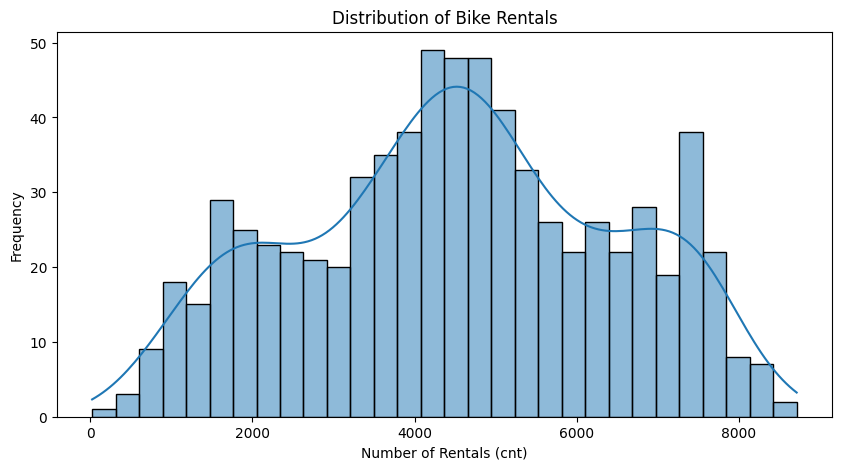

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Number of Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()

### 3.1.2 Numerical Weather features Distributions

In [18]:
numerical_weather = df.select_dtypes(include='float').columns.to_list()
# numerical_weather

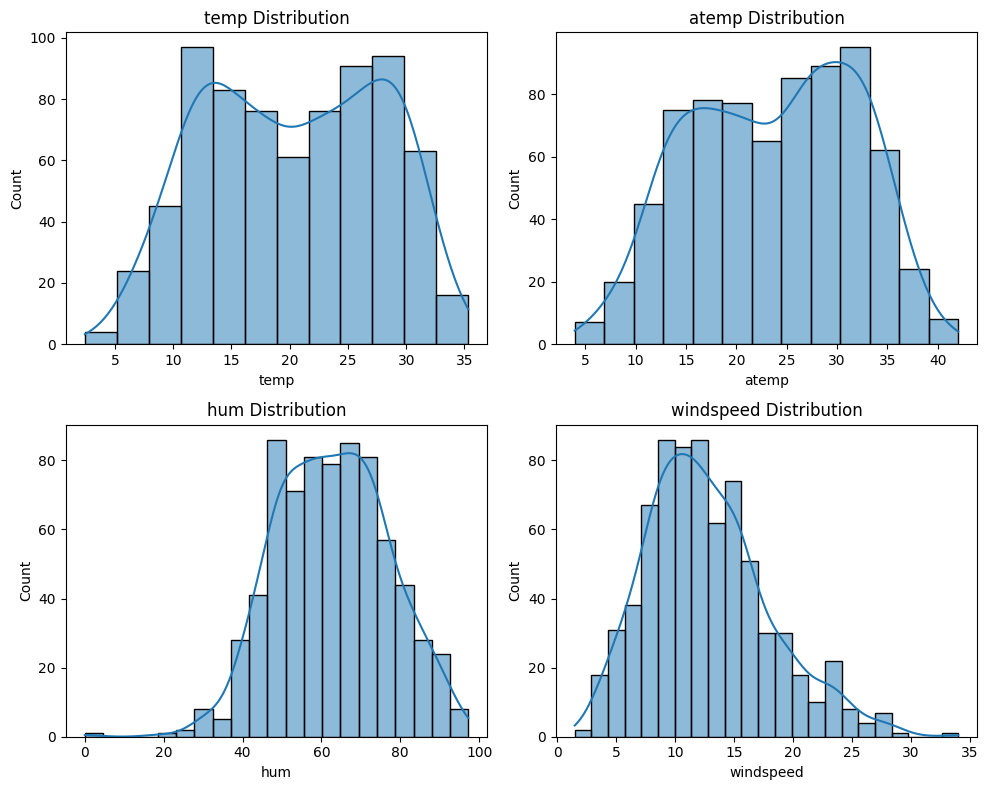

In [19]:
# Setting the number of columns
cols = 2

# Calculating the number of rows needed for subplots
rows = math.ceil(len(numerical_weather) / cols)

fig = plt.figure(figsize=(10, 8))

for i, col in enumerate(numerical_weather):
    ax = plt.subplot(rows, cols, i + 1)  # +1 because subplot indices start at 1
    sns.histplot(x=df[col], ax=ax, kde=True)
    ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


The numerical weather fields appear to have skewed or bimodal distributions.

**StandardScaler (Standardization)** is the preferred scaling method here since it is more suited to data that is not normally distributed.

### 3.1.3 Outlier Check - All Numerical Features 

In [20]:
numerical_cols = numerical_weather + ['cnt']

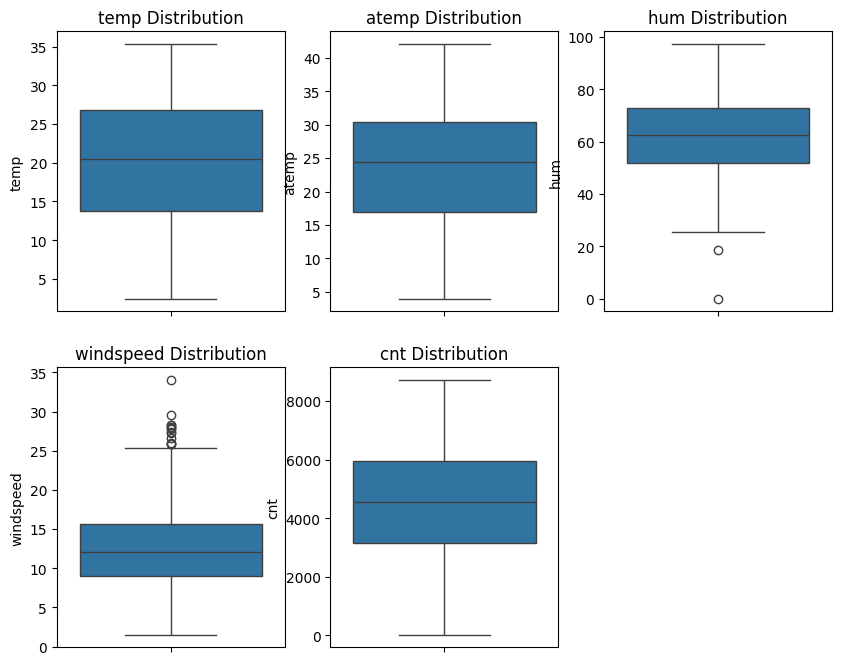

In [21]:
# Setting the number of columns
cols = 3

# Calculating the number of rows needed for subplots
rows = math.ceil(len(numerical_cols) / cols)

fig = plt.figure(figsize=(10, 8))

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(rows, cols, i + 1)  # +1 because subplot indices start at 1
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'{col} Distribution')

# plt.tight_layout()
plt.show()


**OBSERVATIONS**
- There are a few outliers in the **windspeed** & **hum** columns. We can cap those.

We can use the Interquartile Range (IQR) method to detect and handle outliers in numerical columns. Instead of removing outliers, we'll cap them at the upper and lower bounds to preserve data.

We set the boundaries as follows - 
- on the upper side : 1.5 x IQR above Q3
- on the lower side : 1.5 x IQR below Q1

In [22]:
def udf_outlier_correction(df, columns):
    """
    Handles outliers in specified columns of a DataFrame by capping values 
    outside the interquartile range (IQR) for continuous numerical data only.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The Main Dataframe that needs outliers correction.
    columns : list of strings
        The columns containing outliers.

    Returns:
    --------
    pandas.DataFrame
        The DataFrame with outliers capped at the lower and upper bounds 
        of the IQR for the specified continuous numerical columns.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
                
        IQR = Q3 - Q1   # Calculate the Interquartile Range (IQR)
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the values using np.clip and ensure they are integer
        df[col] = np.clip(df[col], lower_bound, upper_bound)

    return df

In [23]:
df = udf_outlier_correction(df, ['windspeed', 'hum'])

###  3.1.4 Categorical Features distribution

#### Frequency Distribution for **season** column

In [24]:
df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

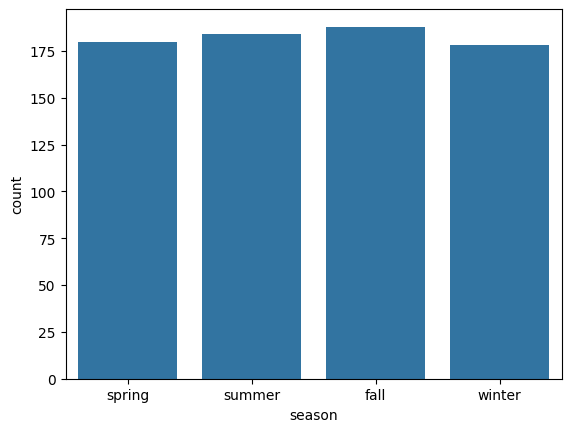

In [25]:
sns.countplot(data=df, x=df['season'])
plt.show()

#### Frequency Distribution for **weathersit** column

In [26]:
df['weathersit'].value_counts()

weathersit
Clear              463
Mist               246
Light_Snow_Rain     21
Heavy_Rain           0
Name: count, dtype: int64

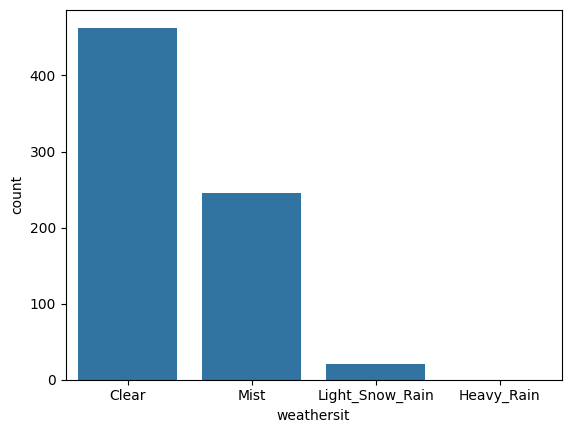

In [27]:
sns.countplot(data=df, x=df['weathersit'])
plt.show()

OBSERVATIONS:
- All seasons' occurence is approximately the same throught the dataset
- We see only 3 out of 4 weather situations mentioned in data dictionary. 
- In these 3 weathers - 'Clear' is most dominant as compared to 'Mist' and 'Light_Snow_Rain'

#### Frequency Distribution for Months in **mnth** column

In [28]:
df['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

#### Frequency Distribution for **weekday** column

In [29]:
df['weekday'].value_counts()

weekday
Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: count, dtype: int64

## 3.2 Time Series Analysis

#### Setting **dteday** as datetime index. This helps us visualize the Target feature **cnt** trend over time

In [30]:
df.set_index('dteday', inplace=True)

### 3.2.1 Trend of Bike Rentals - Daily Timeframe

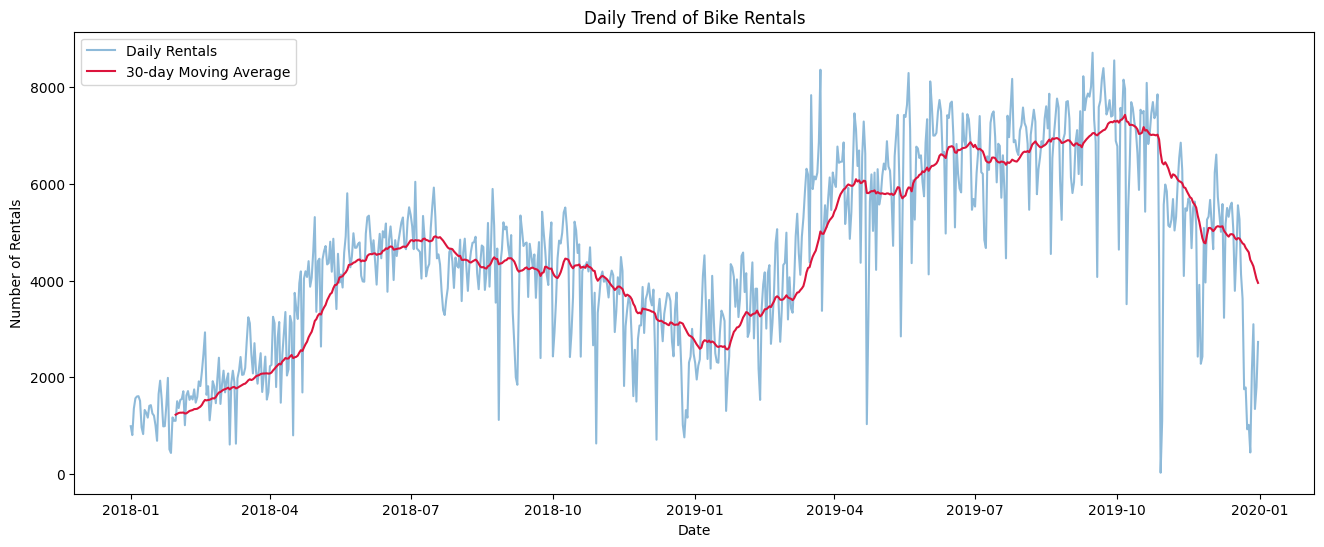

In [31]:
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the daily rentals
ax.plot(df.index, df['cnt'], alpha=0.5, label='Daily Rentals')

# Calculate the 30-day moving average
moving_average = df['cnt'].rolling(window=30).mean()

# Plot the 30-day moving average on the same axis
ax.plot(df.index, moving_average, color='crimson', label='30-day Moving Average')

# Set the title and labels
ax.set_title('Daily Trend of Bike Rentals')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Rentals')

ax.legend()
plt.show()


### 3.2.2 Trend of Bike Rentals - Monthly Timeframe (continuous)

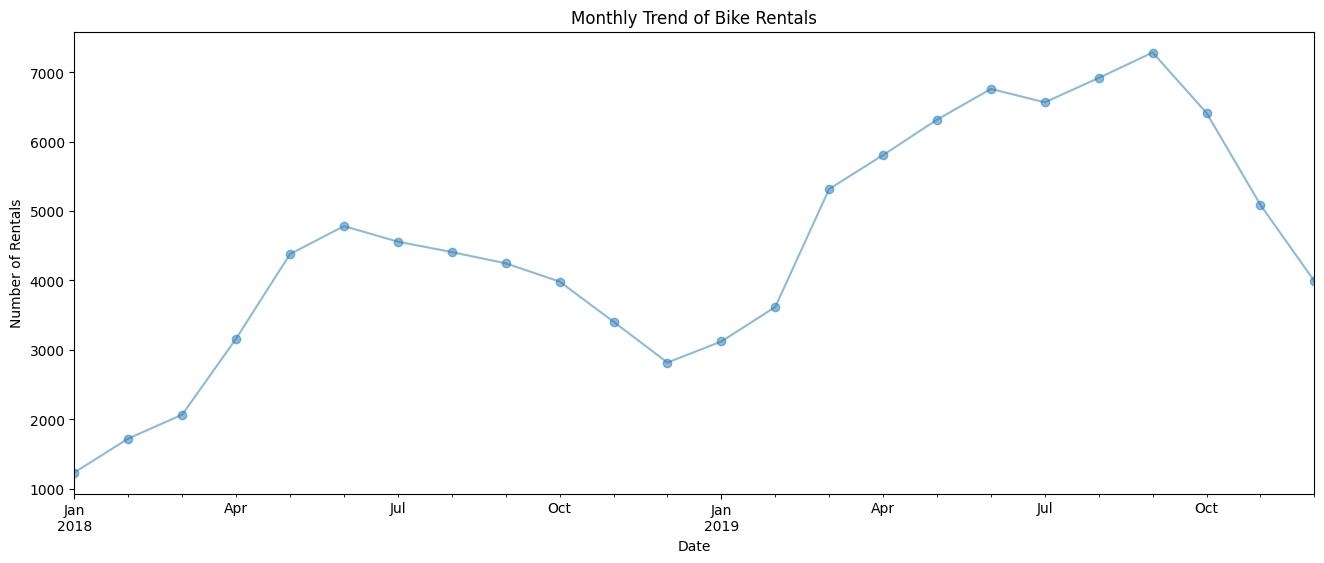

In [32]:
# Resampled the data to monthly frequency and calculated mean
monthly_cnt = df['cnt'].resample('ME').mean()

plt.figure(figsize=(16, 6))

monthly_cnt.plot(alpha=0.5, label='Monthly Rentals', marker='o')
plt.title('Monthly Trend of Bike Rentals')
plt.xlabel('Date') 
plt.ylabel('Number of Rentals')

plt.show()


**OBSERVATIONS**
- From both the above plots we see that there is a dip near the Year Start/End
- There is also a significant soar in bike rentals during the middle of the year

## 3.3 Bivariate & Multivariate Analysis

### 3.3.1 Distribution of Bike Rentals - Monthly Timeframe (discrete)

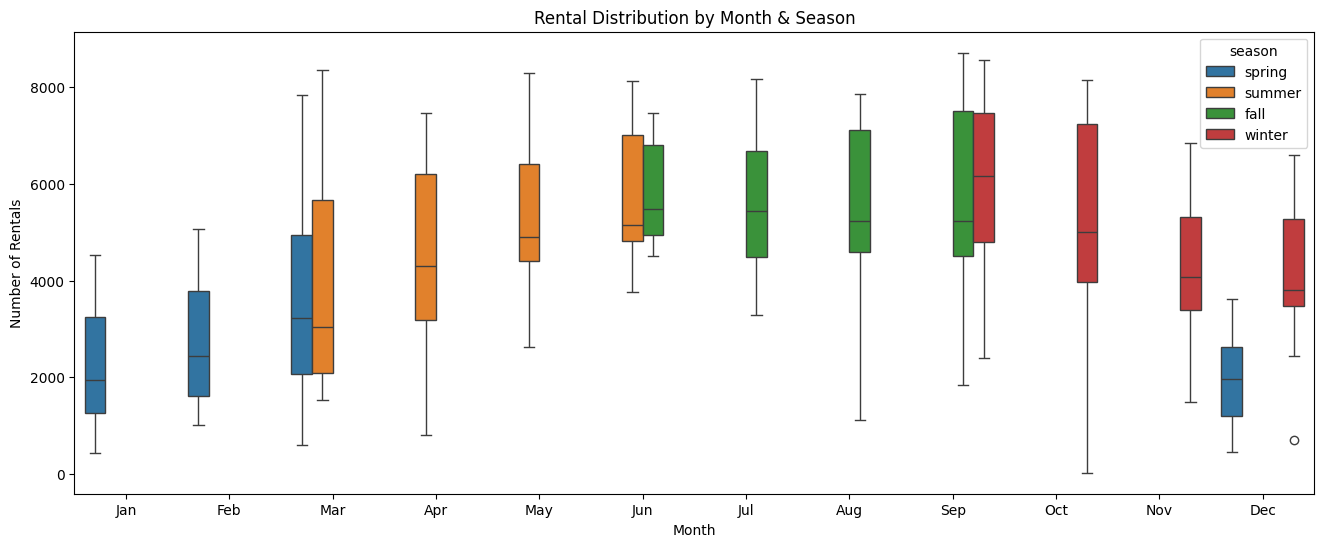

In [33]:
# 3. Box Plot by Month to show seasonal patterns
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['mnth'], y=df['cnt'], hue=df['season'])
plt.title('Rental Distribution by Month & Season')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.show()

**OBSERVATIONS**
- We can see that **Summer & Fall** Months near the middle of the Year usually have much higher Bike Rentals compared to other seasons
- Rentals start declining near the start of Winter and only start to rise near the End of Spring

### 3.3.2 Seasonal Distribution of Bike Rental Pattern

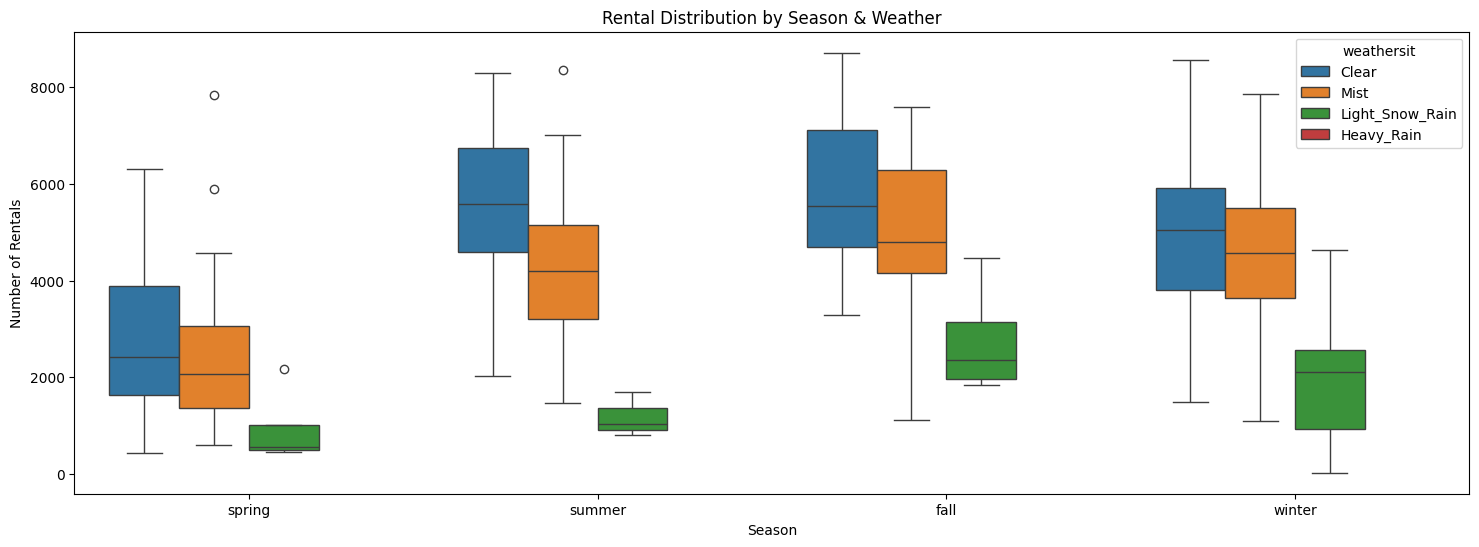

In [34]:
plt.figure(figsize=(18, 6))
sns.boxplot(x=df['season'], y=df['cnt'], hue=df['weathersit'])
plt.title('Rental Distribution by Season & Weather')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.show()

**OBSERVATIONS**
- **Clear** weather ensures highest Bike Rentals across all Seasons, closely followed by **Misty** conditions
- Snow /  Rain -> Significant fall in rentals as people tend to stay indoors

### 3.3.3 Categorical Features Influence on Bike Rentals

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.3 KB


In [36]:
categorical_cols = ['yr', 'weathersit', 'holiday', 'workingday']
categorical_cols = df.select_dtypes(include=['category']).columns
categorical_cols

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

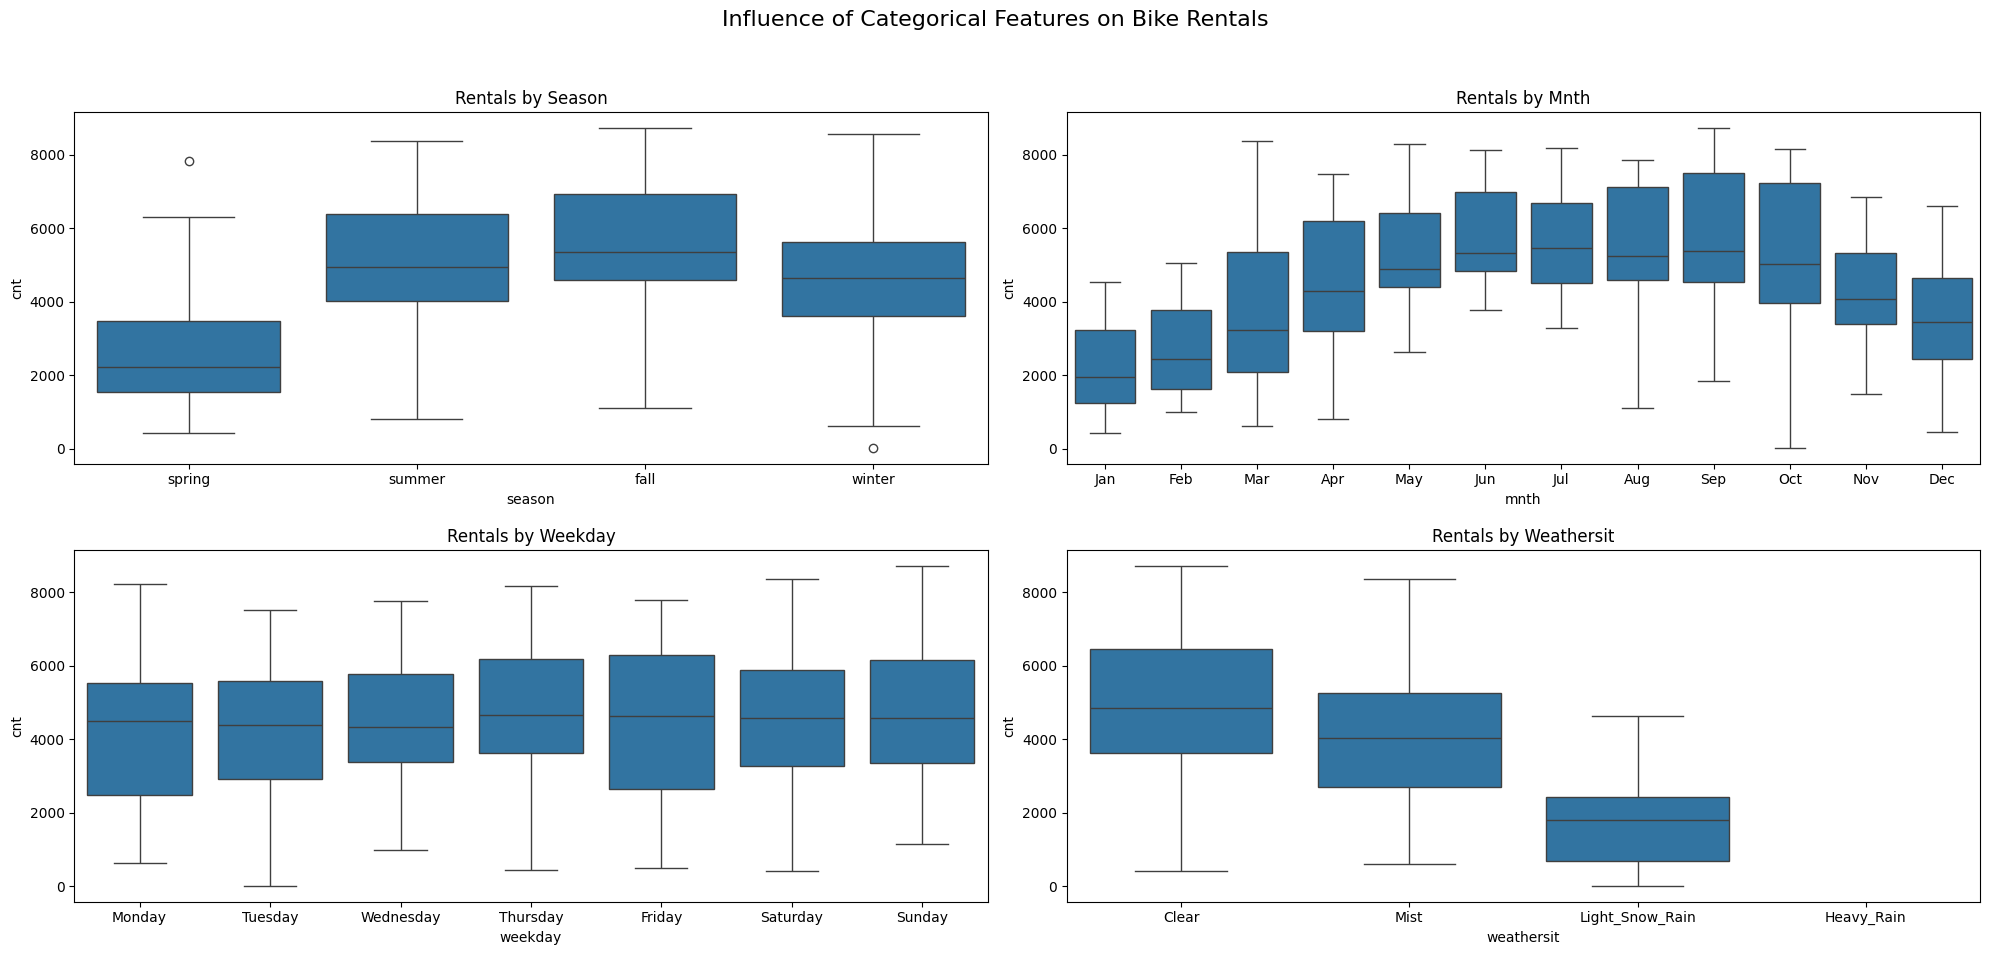

In [37]:
# Setting the number of columns
cols = 2

# Calculating the number of rows needed for subplots
rows = math.ceil(len(categorical_cols) / cols)

# Create a figure and set the overall title
fig = plt.figure(figsize=(20, rows * 5))
fig.suptitle('Influence of Categorical Features on Bike Rentals', fontsize=16)

# Create box plots for each categorical feature
for i, col in enumerate(categorical_cols):
    # Calculate the position for the current subplot
    ax = plt.subplot(rows, cols, i + 1)  # +1 because subplot indices start at 1
    sns.boxplot(data=df, x=col, y='cnt', ax=ax)
    ax.set_title(f'Rentals by {col.capitalize()}')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=1.5)  # Adjust to make space for the suptitle and add vertical spacing
plt.show()


### 3.3.4 Relationship between Numerical Variables

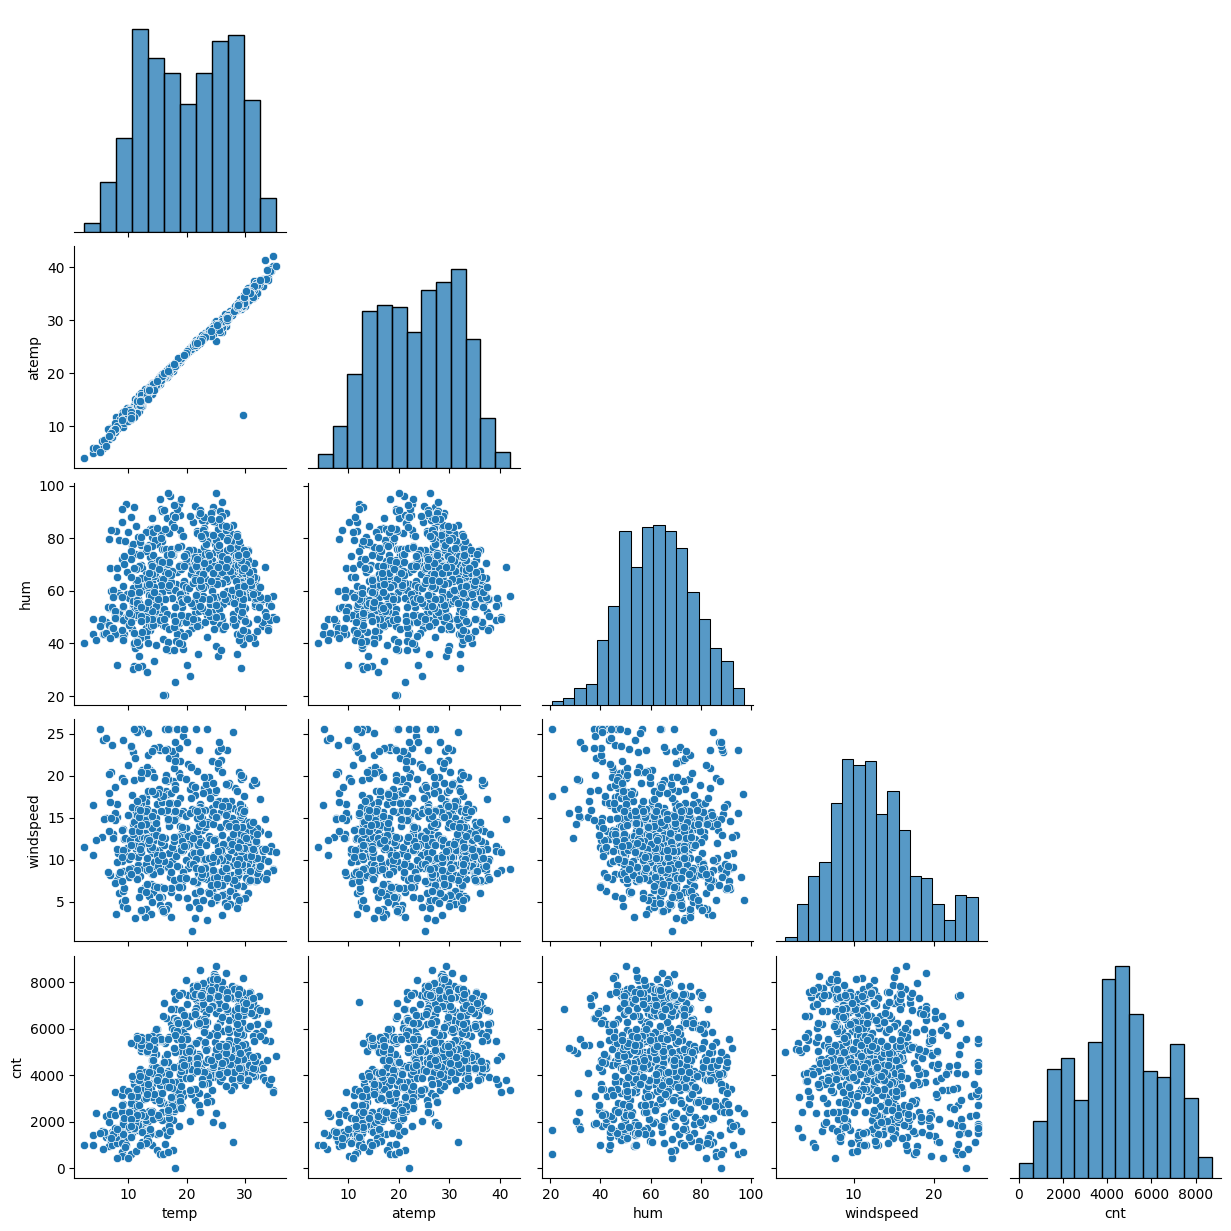

In [38]:
sns.pairplot(data=df[numerical_cols], corner=True)
plt.show()

**OBSERVATIONS**
- We can see that **temp** & **atemp** are highly correlated, so we need to drop one of these to ensure we avoid multicollinearity in our regression model
- Also **temp** has silght positive correlation with target variable **cnt**
- Other variables don't show much promise

## 3.4 Correlation Analysis

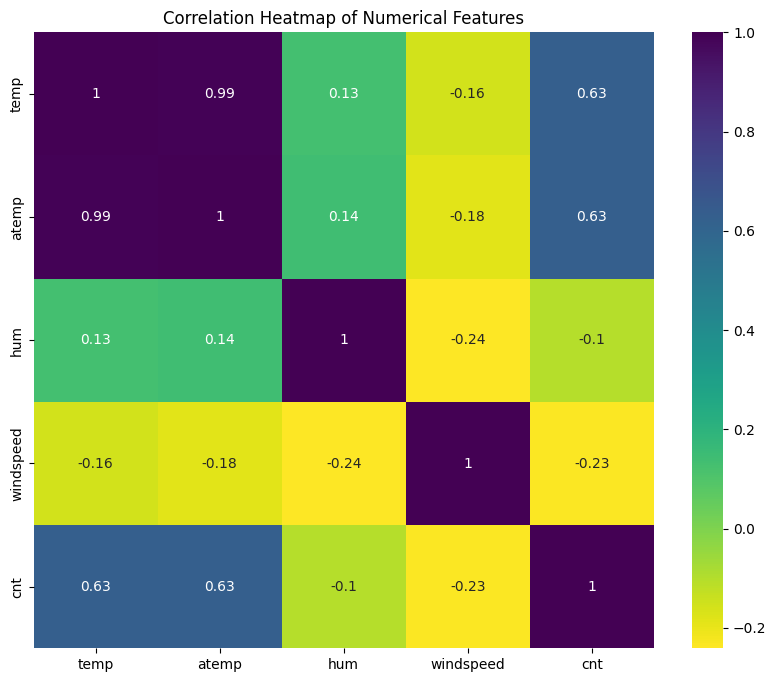

In [39]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlations = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='viridis_r')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**OBSERVATIONS**
- We once again see that **temp** & **atemp** have high correlation (0.99), we shall proceed with dropping **atemp**

In [40]:
df.drop(columns='atemp', inplace=True)
numerical_cols.remove('atemp')
numerical_weather.remove('atemp')

#### After the Timeseries Analysis, the datetime index is no longer needed

In [41]:
df.reset_index(inplace=True)
df.drop(columns=['dteday'], inplace=True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.111,80.583,10.750,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.903,69.609,16.652,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.051,43.727,16.637,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200,59.044,10.740,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305,43.696,12.522,1600


# 4. Linear Regression

## 4.1 Dummy Creation

We need to create dummies for Categorical features

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [43]:
categorical_cols = df.select_dtypes(include='category').columns.to_list()
categorical_cols

['season', 'mnth', 'weekday', 'weathersit']

In [44]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=int, drop_first=True)
# 'dtype=int' ensures that the new encoded columns are of integer type
# 'drop_first=True' removes the first category to avoid multicollinearity

df_encoded.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weathersit_Mist,weathersit_Light_Snow_Rain,weathersit_Heavy_Rain
0,0,0,1,14.111,80.583,10.750,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,14.903,69.609,16.652,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,8.051,43.727,16.637,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200,59.044,10.740,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305,43.696,12.522,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [45]:
df_encoded.shape

(730, 30)

## 4.2 Splitting into Train-Test Sets

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
df_train, df_test = train_test_split(df_encoded, train_size=0.8, test_size=0.2, random_state=100)
print('Train:',df_train.shape)
print('Test: ',df_test.shape)

Train: (584, 30)
Test:  (146, 30)


In [48]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weathersit_Mist,weathersit_Light_Snow_Rain,weathersit_Heavy_Rain
367,1,0,1,6.150,44.125,24.500,2236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
648,1,0,1,17.835,46.333,12.167,7570,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
44,0,0,1,17.015,37.583,25.501,1913,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
705,1,0,0,13.154,76.417,8.750,5008,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
379,1,0,1,6.833,41.917,16.834,2311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [49]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weathersit_Mist,weathersit_Light_Snow_Rain,weathersit_Heavy_Rain
184,0,1,0,29.793,63.792,5.459,6043,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
535,1,0,1,32.083,59.208,7.625,6211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
299,0,0,0,19.270,81.292,13.250,2659,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
221,0,0,1,31.433,42.417,13.417,4780,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,0,29.315,30.500,19.583,4968,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 4.3 Scaling

After the test-train split, the variables need to be Scaled for better interpretability. We only need the scale the numeric columns and not the dummy variables.
Scaling has to be done after Train-Test split, on train & test data separately, so that the model doesn't learn from the test data and any biases are avoided.

We saw earlier, in **Numerical Weather features Distributions** that StandardScaler is better suited for Non-Normal Distributions

In [50]:
# Instantiate Scaler
scaler = StandardScaler()

In [51]:
# Verifying our list of Numerical fields
numerical_cols

['temp', 'hum', 'windspeed', 'cnt']

In [52]:
# Fitting on our train dataset
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weathersit_Mist,weathersit_Light_Snow_Rain,weathersit_Heavy_Rain
367,1,0,1,-1.884,-1.369,2.310,-1.160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
648,1,0,1,-0.307,-1.209,-0.113,1.566,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
44,0,0,1,-0.417,-1.841,2.506,-1.325,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
705,1,0,0,-0.939,0.965,-0.784,0.257,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
379,1,0,1,-1.792,-1.528,0.804,-1.121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [53]:
df_train[numerical_cols].describe()

,temp,hum,windspeed,cnt
count,584.000,584.000,584.000,584.000
mean,-0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001
min,-2.387,-3.074,-1.946,-2.291
25%,-0.876,-0.800,-0.727,-0.733
50%,0.035,0.027,-0.141,0.031
75%,0.884,0.718,0.566,0.782
max,2.055,2.455,2.506,2.151


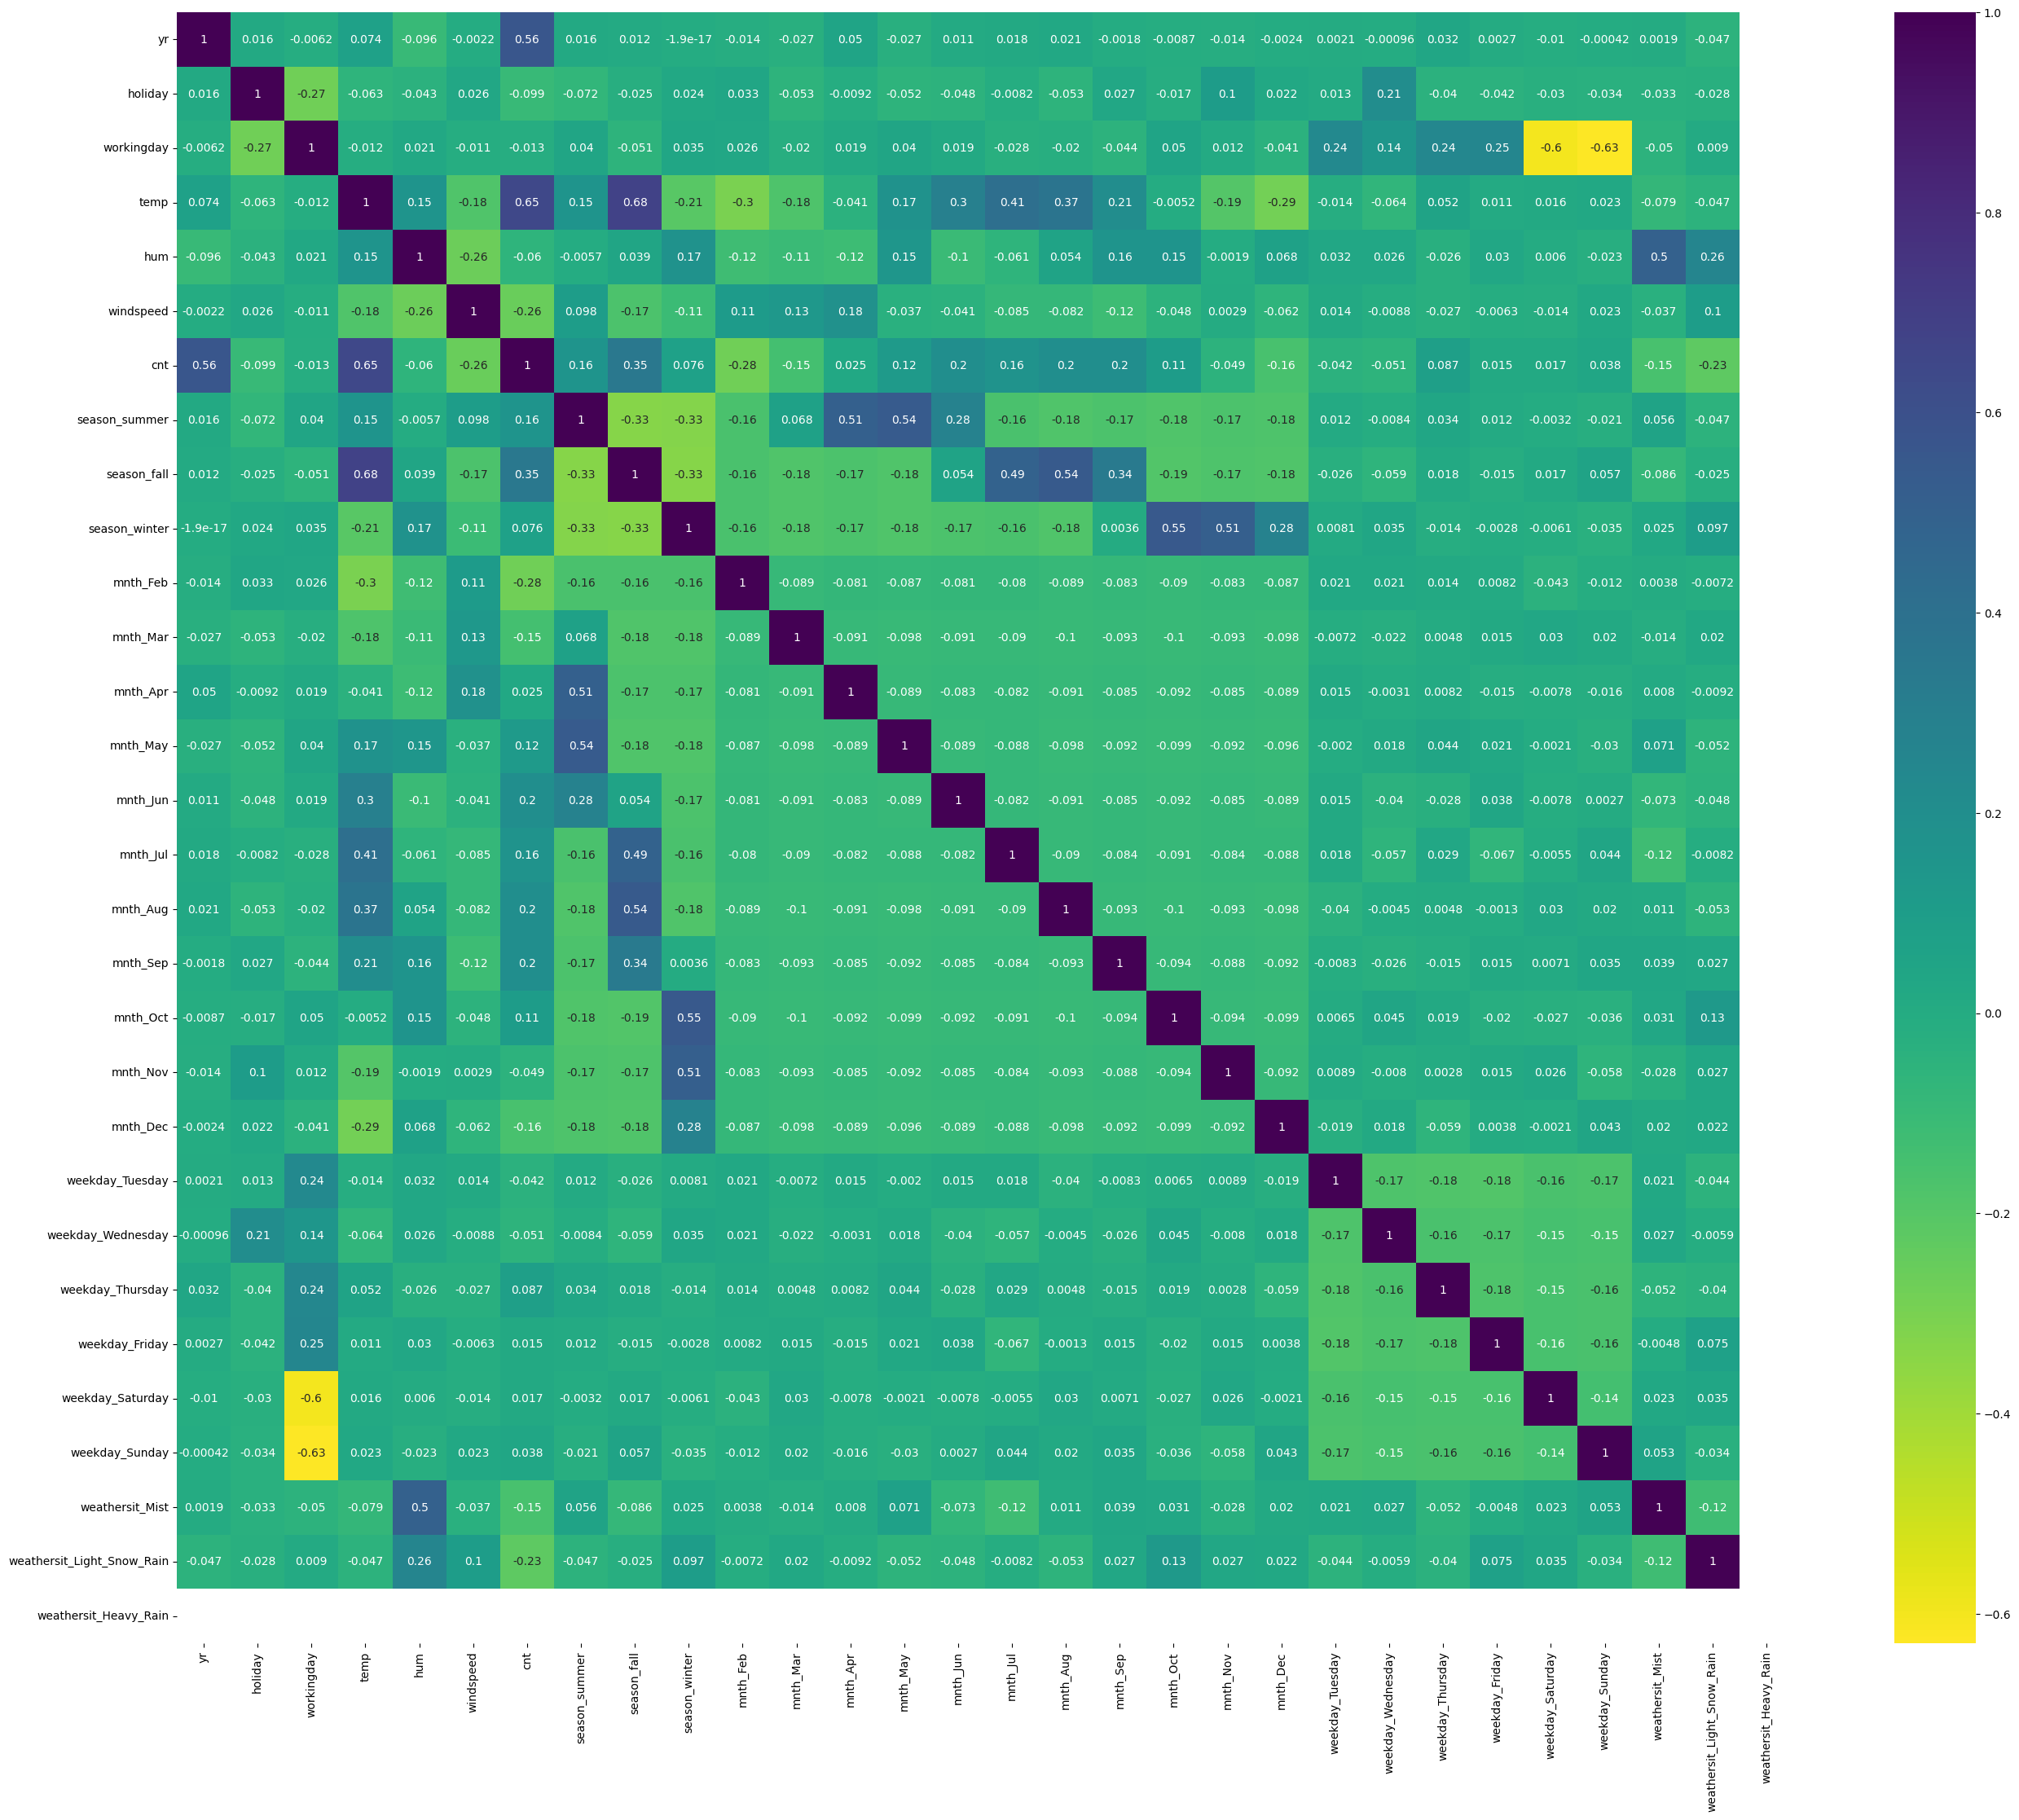

In [54]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (32, 26))
sns.heatmap(df_train.corr(), annot = True, cmap="viridis_r")
plt.show()

## 4.4 Building the Model

In [55]:
# Splitting the df_train into X and Y sets for Model Building
y_train = df_train.pop('cnt')
X_train = df_train

In [56]:
X_train.shape, y_train.shape

((584, 29), (584,))

### First Model with all Features

In [57]:
X_train_all = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_all).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     116.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.75e-212
Time:                        16:50:50   Log-Likelihood:                -265.74
No. Observations:                 584   AIC:                             589.5
Df Residuals:                     555   BIC:                             716.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8681      0.317     -2.735      0.006      -1.492      -0.245
yr                             1.0122      0.033     30.414      0.000       0.947       1.078
holiday                       -0.5869      0.286     -2.054      0.040      -1.148      -0.026
workingday                    -0.2165      0.306     -0.708      0.479      -0.817       0.384
temp                           0.4444      0.043     10.333      0.000       0.360       0.529
hum                           -0.0971      0.024     -4.086      0.000      -0.144      -0.050
windspeed                     -0.1313      0.018     -7.308      0.000      -0.167      -0.096
season_summer                  0.4336      0.101      4.297      0.000       0.235       0.632
season_fall                    0.2495      0.123      2.033      0.043       0.008       0.491
season_winter                  0.7404      0.103      7.209      0.000       0.539       0.942
mnth_Feb                       0.1196      0.083      1.441      0.150      -0.043       0.283
mnth_Mar                       0.2811      0.093      3.022      0.003       0.098       0.464
mnth_Apr                       0.2669      0.141      1.891      0.059      -0.010       0.544
mnth_May                       0.3526      0.151      2.328      0.020       0.055       0.650
mnth_Jun                       0.3183      0.160      1.986      0.048       0.003       0.633
mnth_Jul                       0.1204      0.180      0.670      0.503      -0.232       0.473
mnth_Aug                       0.3527      0.171      2.067      0.039       0.018       0.688
mnth_Sep                       0.6184      0.152      4.081      0.000       0.321       0.916
mnth_Oct                       0.3176      0.137      2.311      0.021       0.048       0.588
mnth_Nov                       0.0414      0.132      0.313      0.754      -0.218       0.301
mnth_Dec                       0.0372      0.103      0.361      0.718      -0.165       0.240
weekday_Tuesday                0.0157      0.058      0.271      0.787      -0.098       0.130
weekday_Wednesday              0.0897      0.062      1.452      0.147      -0.032       0.211
weekday_Thursday               0.1445      0.060      2.420      0.016       0.027       0.262
weekday_Friday                 0.1418      0.059      2.403      0.017       0.026       0.258
weekday_Saturday              -0.0584      0.308     -0.189      0.850      -0.664       0.547
weekday_Sunday                -0.0288      0.308     -0.094      0.925      -0.634       0.576
weathersit_Mist               -0.2518      0.044     -5.734      0.000      -0.338      -0.166
weathersit_Light_Snow_Rain    -1.1281      0.114     -9.897      0.000      -1.352      -0.904
weathersit_Heavy_Rain               0      

#### This preliminary model with all variables gives an **Adjusted R-squared = 84.7%**
But the number of features is too high. We will use RFE to narrow down to features that might have significant impact on the target variable and drop the insignificant.

### 4.4.1 RFE - Recursive Feature Elimination
- Using LinearRegression function from SciKit Learn

In [58]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
# Running RFE with output number of variables = 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

#### RFE ranking of all features

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', False, 7),
 ('windspeed', False, 3),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Mar', True, 1),
 ('mnth_Apr', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Jul', False, 8),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 12),
 ('mnth_Dec', False, 13),
 ('weekday_Tuesday', False, 14),
 ('weekday_Wednesday', False, 9),
 ('weekday_Thursday', False, 5),
 ('weekday_Friday', False, 6),
 ('weekday_Saturday', False, 10),
 ('weekday_Sunday', False, 11),
 ('weathersit_Mist', True, 1),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Heavy_Rain', False, 15)]

15 features with 'True' values selected for Model Building

In [61]:
# Features selected using RFE
rfe_cols = X_train.columns[rfe.support_]
print('Columns:',len(rfe_cols))
rfe_cols

Columns: 15


Index(['yr', 'holiday', 'temp', 'season_summer', 'season_fall', 'season_winter', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'weathersit_Mist', 'weathersit_Light_Snow_Rain'], dtype='object')

#### Creating a new DataFrame containing only the features that RFE has Ranked to be significant for the model

In [62]:
# only keep top ranking features in the training set
X_train_rfe = X_train[rfe_cols]

print('Shape', X_train_rfe.shape)
X_train_rfe.head()

Shape (584, 15)


,yr,holiday,temp,season_summer,season_fall,season_winter,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Aug,mnth_Sep,mnth_Oct,weathersit_Mist,weathersit_Light_Snow_Rain
367,1,0,-1.884,0,0,0,0,0,0,0,0,0,0,0,0
648,1,0,-0.307,0,0,1,0,0,0,0,0,0,1,0,0
44,0,0,-0.417,0,0,0,0,0,0,0,0,0,0,0,0
705,1,0,-0.939,0,0,1,0,0,0,0,0,0,0,1,0
379,1,0,-1.792,0,0,0,0,0,0,0,0,0,0,0,0


### 4.4.2 Building Model using Statsmodel for Detailed Statistics

#### We define some functions -
- For building model - udf_build_model
- For VIF calculation - udf_calculate_vif

This helps us reduce the amount of code

In [63]:
def udf_build_model(X, y):
    """
    Builds an OLS regression model.

    Parameters:
    X : pandas.DataFrame
        Features dataframe (excluding target variable).
    y : pandas.Series
        Target variable.

    Returns:
    model : statsmodels OLS object
        The fitted regression model with full summary available.
    """
    # Add constant to the model (intercept term)
    X_with_const = sm.add_constant(X)
    
    # Fit the model
    model = sm.OLS(y, X_with_const).fit()
    
    return model, X_with_const

In [64]:
def udf_calculate_vif(X):
    """
    Calculate VIF for each feature in the dataset, excluding the constant term.
    
    Parameters:
    X : pandas.DataFrame
        Features dataframe (including the constant column).
        
    Returns:
    vif_df : pandas.DataFrame
        DataFrame with features and their VIF scores.
    """
    # Drop the 'const' column before calculating VIF
    X_for_vif = X.drop(columns='const')
    
    vif = pd.DataFrame()
    vif["Feature"] = X_for_vif.columns
    vif["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif


#### **Considerations for feature selection**
- High p, high VIF: Definitely remove
- High-low situation:
    - High p, low VIF: Remove these first - this high p value might be correlated to one of the high VIF variables and dropping this might decrease the high VIF of other variables.
    - Low p, High VIF: Remove after the above are removed - This VIF might drop after dropping the above variables
- Low p low VIF: Keep it

In [65]:
type(y_train)

pandas.core.series.Series

In [66]:
# Building the Model
model, X_train_rfe = udf_build_model(X_train_rfe, y_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     189.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.25e-209
Time:                        16:50:51   Log-Likelihood:                -305.82
No. Observations:                 584   AIC:                             643.6
Df Residuals:                     568   BIC:                             713.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.9058      0.061    -14.749      0.000      -1.026      -0.785
yr                             1.0328      0.035     29.785      0.000       0.965       1.101
holiday                       -0.4255      0.106     -4.003      0.000      -0.634      -0.217
temp                           0.4451      0.035     12.618      0.000       0.376       0.514
season_summer                  0.4642      0.098      4.749      0.000       0.272       0.656
season_fall                    0.3358      0.099      3.393      0.001       0.141       0.530
season_winter                  0.7487      0.062     12.122      0.000       0.627       0.870
mnth_Mar                       0.2109      0.074      2.847      0.005       0.065       0.356
mnth_Apr                       0.1361      0.113      1.199      0.231      -0.087       0.359
mnth_May                       0.2524      0.116      2.178      0.030       0.025       0.480
mnth_Jun                       0.2513      0.100      2.521      0.012       0.055       0.447
mnth_Aug                       0.2362      0.080      2.960      0.003       0.079       0.393
mnth_Sep                       0.5205      0.075      6.934      0.000       0.373       0.668
mnth_Oct                       0.2481      0.075      3.309      0.001       0.101       0.395
weathersit_Mist               -0.3464      0.037     -9.327      0.000      -0.419      -0.273
weathersit_Light_Snow_Rain    -1.3843      0.108    -12.873      0.000      -1.596      -1.173
==============================================================================
Omnibus:                       99.082   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.693
Skew:                          -0.831   Prob(JB):                     3.04e-61
Kurtosis:                       5.948   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = udf_calculate_vif(X_train_rfe)
vif

,Feature,VIF
3,season_summer,7.362
4,season_fall,3.673
8,mnth_May,3.565
7,mnth_Apr,3.275
9,mnth_Jun,2.292
2,temp,2.256
5,season_winter,2.036
10,mnth_Aug,1.954
0,yr,1.827
12,mnth_Oct,1.709


**OBSERVATIONS**
- R-squared = 0.833 & adj-R-squared = 0.829
- `mnth_Apr` is insignificant in presence of other variables with a p-value = 0.231
- Even though `season_summer` has high VIF of around 7.362, p-value takes priority
- We will proceed with dropping `mnth_Apr`

In [68]:
X_train_1 = X_train_rfe.drop(columns='mnth_Apr')
len(X_train_1.columns)

15

In [69]:
model_1, X_train_1 = udf_build_model(X_train_1, y_train)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     202.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.18e-210
Time:                        16:50:51   Log-Likelihood:                -306.56
No. Observations:                 584   AIC:                             643.1
Df Residuals:                     569   BIC:                             708.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8930      0.060    -14.760      0.000      -1.012      -0.774
yr                             1.0334      0.035     29.793      0.000       0.965       1.101
holiday                       -0.4294      0.106     -4.041      0.000      -0.638      -0.221
temp                           0.4478      0.035     12.712      0.000       0.379       0.517
season_summer                  0.5480      0.068      8.017      0.000       0.414       0.682
season_fall                    0.3360      0.099      3.394      0.001       0.142       0.530
season_winter                  0.7395      0.061     12.062      0.000       0.619       0.860
mnth_Mar                       0.1715      0.066      2.582      0.010       0.041       0.302
mnth_May                       0.1549      0.083      1.875      0.061      -0.007       0.317
mnth_Jun                       0.1800      0.080      2.248      0.025       0.023       0.337
mnth_Aug                       0.2205      0.079      2.800      0.005       0.066       0.375
mnth_Sep                       0.5087      0.074      6.833      0.000       0.363       0.655
mnth_Oct                       0.2453      0.075      3.272      0.001       0.098       0.393
weathersit_Mist               -0.3483      0.037     -9.383      0.000      -0.421      -0.275
weathersit_Light_Snow_Rain    -1.3867      0.108    -12.893      0.000      -1.598      -1.175
==============================================================================
Omnibus:                      100.218   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.089
Skew:                          -0.842   Prob(JB):                     1.51e-61
Kurtosis:                       5.945   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif_1 = udf_calculate_vif(X_train_1)
vif_1

,Feature,VIF
4,season_fall,3.522
3,season_summer,2.525
2,temp,2.241
5,season_winter,2.035
9,mnth_Aug,1.908
7,mnth_May,1.854
0,yr,1.815
11,mnth_Oct,1.709
12,weathersit_Mist,1.555
8,mnth_Jun,1.519


**OBSERVATIONS**
- R-squared = 0.833 & adj-R-squared = 0.829 - no change
- p-value - `mnth_May` = 0.061
- VIF - all values below 5
- We can proceed with dropping `mnth_May`

In [71]:
X_train_2 = X_train_1.drop(columns='mnth_May')
len(X_train_2.columns)

14

In [72]:
model_2, X_train_2 = udf_build_model(X_train_2, y_train)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.21e-210
Time:                        16:50:51   Log-Likelihood:                -308.36
No. Observations:                 584   AIC:                             644.7
Df Residuals:                     570   BIC:                             705.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8599      0.058    -14.826      0.000      -0.974      -0.746
yr                             1.0277      0.035     29.677      0.000       0.960       1.096
holiday                       -0.4387      0.106     -4.123      0.000      -0.648      -0.230
temp                           0.4695      0.033     14.089      0.000       0.404       0.535
season_summer                  0.5826      0.066      8.835      0.000       0.453       0.712
season_fall                    0.2940      0.097      3.042      0.002       0.104       0.484
season_winter                  0.7226      0.061     11.890      0.000       0.603       0.842
mnth_Mar                       0.1406      0.064      2.181      0.030       0.014       0.267
mnth_Jun                       0.1177      0.073      1.613      0.107      -0.026       0.261
mnth_Aug                       0.2056      0.079      2.619      0.009       0.051       0.360
mnth_Sep                       0.4982      0.074      6.696      0.000       0.352       0.644
mnth_Oct                       0.2317      0.075      3.098      0.002       0.085       0.379
weathersit_Mist               -0.3453      0.037     -9.290      0.000      -0.418      -0.272
weathersit_Light_Snow_Rain    -1.3901      0.108    -12.897      0.000      -1.602      -1.178
==============================================================================
Omnibus:                       96.350   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.843
Skew:                          -0.833   Prob(JB):                     2.06e-55
Kurtosis:                       5.752   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif_2 = udf_calculate_vif(X_train_2)
vif_2

,Feature,VIF
4,season_fall,3.521
2,temp,2.163
5,season_winter,2.032
8,mnth_Aug,1.893
0,yr,1.814
10,mnth_Oct,1.706
3,season_summer,1.680
11,weathersit_Mist,1.539
9,mnth_Sep,1.509
7,mnth_Jun,1.325


**OBSERVATIONS**
- R-squared = 0.832 & adj-R-squared = 0.828 - very slight decrease
-  p-value - `mnth_Jun` = 0.107
- VIF - all values below 5
- We can proceed with dropping `mnth_Jun`

In [74]:
X_train_3 = X_train_2.drop(columns='mnth_Jun')
len(X_train_3.columns)

13

In [75]:
model_3, X_train_3 = udf_build_model(X_train_3, y_train)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.82e-211
Time:                        16:50:51   Log-Likelihood:                -309.69
No. Observations:                 584   AIC:                             645.4
Df Residuals:                     571   BIC:                             702.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8397      0.057    -14.807      0.000      -0.951      -0.728
yr                             1.0264      0.035     29.605      0.000       0.958       1.095
holiday                       -0.4452      0.106     -4.182      0.000      -0.654      -0.236
temp                           0.4838      0.032     15.040      0.000       0.421       0.547
season_summer                  0.5864      0.066      8.886      0.000       0.457       0.716
season_fall                    0.2846      0.097      2.946      0.003       0.095       0.474
season_winter                  0.7150      0.061     11.784      0.000       0.596       0.834
mnth_Mar                       0.1287      0.064      2.007      0.045       0.003       0.255
mnth_Aug                       0.1795      0.077      2.334      0.020       0.028       0.331
mnth_Sep                       0.4790      0.074      6.513      0.000       0.335       0.623
mnth_Oct                       0.2215      0.075      2.968      0.003       0.075       0.368
weathersit_Mist               -0.3480      0.037     -9.361      0.000      -0.421      -0.275
weathersit_Light_Snow_Rain    -1.3937      0.108    -12.915      0.000      -1.606      -1.182
==============================================================================
Omnibus:                       95.203   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.062
Skew:                          -0.831   Prob(JB):                     1.66e-53
Kurtosis:                       5.688   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif_3 = udf_calculate_vif(X_train_3)
vif_3

,Feature,VIF
4,season_fall,3.436
2,temp,2.101
5,season_winter,2.024
7,mnth_Aug,1.813
0,yr,1.807
9,mnth_Oct,1.701
10,weathersit_Mist,1.539
3,season_summer,1.537
8,mnth_Sep,1.469
6,mnth_Mar,1.139


**OBSERVATIONS**
- R-squared = 0.831 & adj-R-squared = 0.827
- p-value - all under 0.05
- VIF - all values below 5

- All p-values under 0.05 & all VIFs under 5. But we have 12 independent variables (excluding the `const`) in the model.
- We can try dropping another variable - `mnth_Mar` since it is close to 0.05 - to simplify the model and see if there's a significant impact.

In [77]:
X_train_4 = X_train_3.drop(columns='mnth_Mar')
len(X_train_4.columns)

12

In [78]:
model_4, X_train_4 = udf_build_model(X_train_4, y_train)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     253.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.28e-211
Time:                        16:50:51   Log-Likelihood:                -311.74
No. Observations:                 584   AIC:                             647.5
Df Residuals:                     572   BIC:                             699.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8042      0.054    -14.886      0.000      -0.910      -0.698
yr                             1.0249      0.035     29.490      0.000       0.957       1.093
holiday                       -0.4601      0.106     -4.320      0.000      -0.669      -0.251
temp                           0.4866      0.032     15.098      0.000       0.423       0.550
season_summer                  0.5678      0.066      8.667      0.000       0.439       0.696
season_fall                    0.2472      0.095      2.601      0.010       0.060       0.434
season_winter                  0.6827      0.059     11.638      0.000       0.568       0.798
mnth_Aug                       0.1797      0.077      2.330      0.020       0.028       0.331
mnth_Sep                       0.4795      0.074      6.503      0.000       0.335       0.624
mnth_Oct                       0.2192      0.075      2.931      0.004       0.072       0.366
weathersit_Mist               -0.3497      0.037     -9.386      0.000      -0.423      -0.277
weathersit_Light_Snow_Rain    -1.3856      0.108    -12.815      0.000      -1.598      -1.173
==============================================================================
Omnibus:                       92.526   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.319
Skew:                          -0.793   Prob(JB):                     1.20e-54
Kurtosis:                       5.773   Cond. No.                         9.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif_4 = udf_calculate_vif(X_train_4)
vif_4

,Feature,VIF
4,season_fall,3.421
2,temp,2.009
5,season_winter,2.001
6,mnth_Aug,1.813
0,yr,1.788
8,mnth_Oct,1.699
9,weathersit_Mist,1.537
3,season_summer,1.500
7,mnth_Sep,1.469
10,weathersit_Light_Snow_Rain,1.074


**OBSERVATIONS**
- R-squared = 0.830 & adj-R-squared = 0.826
- p-value - all values under 0.05
- VIF - all values below 5

This seems like a good place to stop and we can continue to the next step with the current set of variables.

In [80]:
print('Shape:',X_train_4.shape)
X_train_4.head()

Shape: (584, 12)


,const,yr,holiday,temp,season_summer,season_fall,season_winter,mnth_Aug,mnth_Sep,mnth_Oct,weathersit_Mist,weathersit_Light_Snow_Rain
367,1.000,1,0,-1.884,0,0,0,0,0,0,0,0
648,1.000,1,0,-0.307,0,0,1,0,0,1,0,0
44,1.000,0,0,-0.417,0,0,0,0,0,0,0,0
705,1.000,1,0,-0.939,0,0,1,0,0,0,1,0
379,1.000,1,0,-1.792,0,0,0,0,0,0,0,0


### 4.4.3 Residual Analysis of the Train Data

We need to check if the error terms are also Normally Distributed - one of the assumptions of Linear Regression.

In [81]:
# Make predictions on the training data
y_train_pred = model_4.predict(X_train_4)

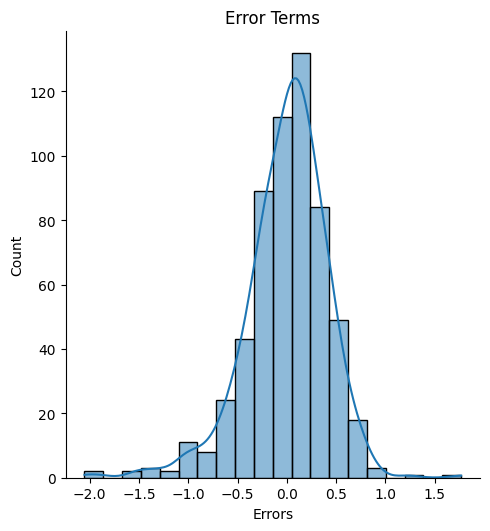

In [82]:
sns.displot((y_train - y_train_pred), bins=20, kde=True)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

## 4.5 Looking at Test Data

### 4.5.1 Making Predictions

Applying scaling on test dataset

In [83]:
# verifying list of columns
numerical_cols

['temp', 'hum', 'windspeed', 'cnt']

In [84]:
# StandardScaling transformation
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

print('Shape:', df_test.shape)
df_test.head()

Shape: (146, 30)


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weathersit_Mist,weathersit_Light_Snow_Rain,weathersit_Heavy_Rain
184,0,1,0,1.307,0.052,-1.430,0.786,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
535,1,0,1,1.616,-0.279,-1.005,0.872,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
299,0,0,0,-0.113,1.317,0.100,-0.943,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
221,0,0,1,1.529,-1.492,0.133,0.140,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,0,1.243,-2.353,1.344,0.236,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [85]:
# Test Dataset Statistics
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weathersit_Mist,weathersit_Light_Snow_Rain,weathersit_Heavy_Rain
count,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000
mean,0.445,0.034,0.548,0.143,-0.098,-0.020,0.007,0.274,0.281,0.219,0.089,0.062,0.103,0.075,0.103,0.123,0.062,0.089,0.055,0.089,0.075,0.082,0.164,0.130,0.103,0.233,0.192,0.315,0.034,0.000
std,0.499,0.182,0.499,1.057,1.096,0.980,0.945,0.448,0.451,0.415,0.286,0.241,0.305,0.265,0.305,0.330,0.241,0.286,0.228,0.286,0.265,0.276,0.372,0.338,0.305,0.424,0.395,0.466,0.182,0.000
min,0.000,0.000,0.000,-2.180,-2.720,-2.208,-2.044,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,-0.792,-0.809,-0.745,-0.553,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,1.000,0.101,-0.246,-0.070,-0.031,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,1.175,0.566,0.576,0.596,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
max,1.000,1.000,1.000,1.985,2.470,2.506,1.988,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000


Dividing into X & Y sets

In [86]:
y_test = df_test.pop('cnt')
X_test = df_test

In [87]:
X_test.shape

(146, 29)

In [88]:
# List of features in our final Model (model_4) - X_train_4 (independent variables dataframe)
X_train_4_cols = X_train_4.columns.to_list()
X_train_4_cols.remove('const')
print(X_train_4_cols)

['yr', 'holiday', 'temp', 'season_summer', 'season_fall', 'season_winter', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'weathersit_Mist', 'weathersit_Light_Snow_Rain']


In [89]:
# Creating Test dataframe with same features as our final training model X_train_4
X_test_4 = X_test[X_train_4_cols]

# Adding a const variable
X_test_4 = sm.add_constant(X_test_4)

X_test_4.head()

,const,yr,holiday,temp,season_summer,season_fall,season_winter,mnth_Aug,mnth_Sep,mnth_Oct,weathersit_Mist,weathersit_Light_Snow_Rain
184,1.000,0,1,1.307,0,1,0,0,0,0,1,0
535,1.000,1,0,1.616,1,0,0,0,0,0,0,0
299,1.000,0,0,-0.113,0,0,1,0,0,1,1,0
221,1.000,0,0,1.529,0,1,0,1,0,0,0,0
152,1.000,0,0,1.243,1,0,0,0,0,0,0,0


In [90]:
# Making predictions
y_test_pred = model_4.predict(X_test_4)

### 4.5.2 Model Evaluation

In [91]:
from sklearn.metrics import r2_score

Text(0, 0.5, 'y_test_pred')

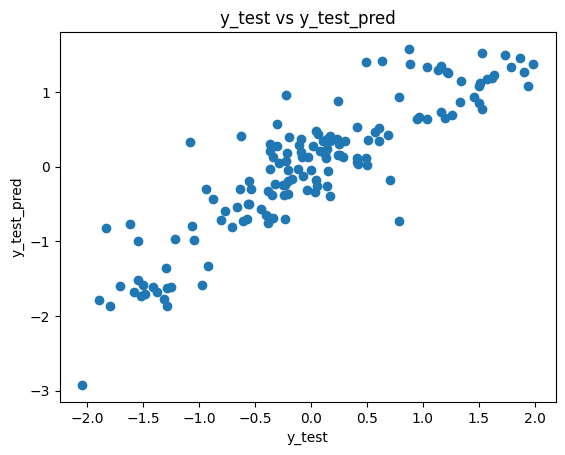

In [92]:
# Plotting y_test vs y_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

#### R2-squared for Target Variable on Test Data

In [93]:
r2_score_test = r2_score(y_true=y_test, y_pred=y_test_pred)

print('R-squared on Test Data:',round(r2_score_test,2))

R-squared on Test Data: 0.78


#### Checking the Correlation between Final predictor variables

In [94]:
final_cols = X_train_4.columns[1:].to_list() # skip constant
print('Final Predictor Variable Count:',len(final_cols))
final_cols

Final Predictor Variable Count: 11


['yr',
 'holiday',
 'temp',
 'season_summer',
 'season_fall',
 'season_winter',
 'mnth_Aug',
 'mnth_Sep',
 'mnth_Oct',
 'weathersit_Mist',
 'weathersit_Light_Snow_Rain']

In [95]:
# df_encoded <- unscaled dataframe before train-test split
corr_df = round(df_encoded[final_cols].corr(), 3)

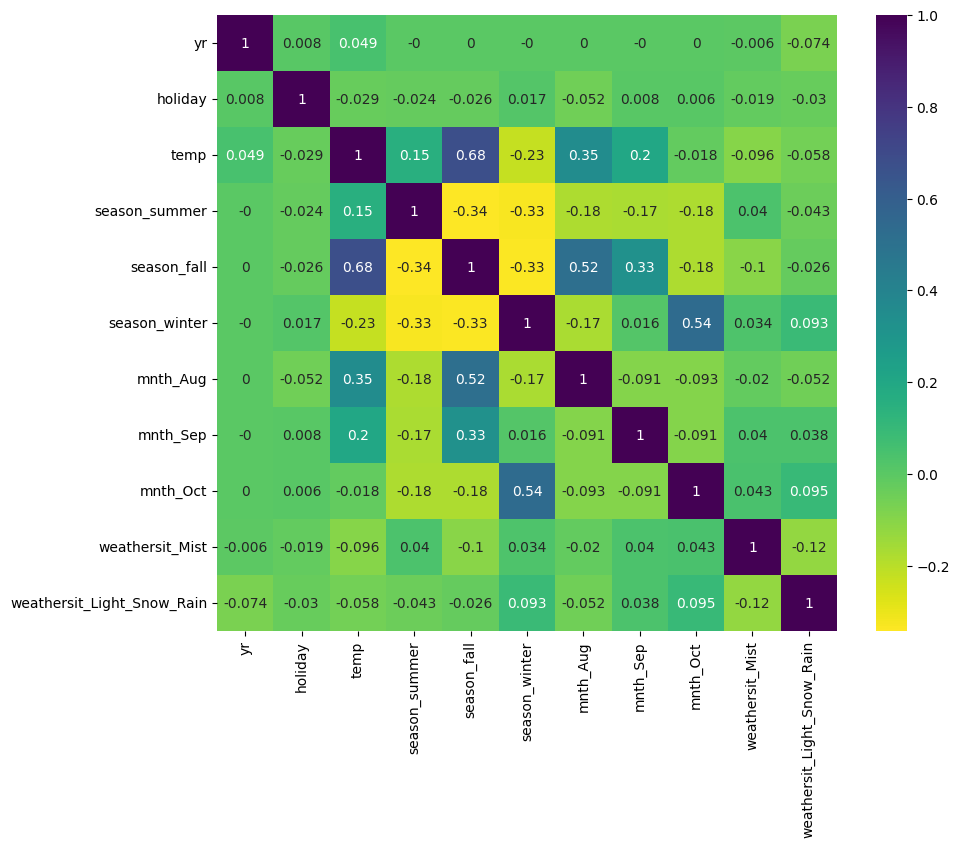

In [96]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, cmap="viridis_r", annot=True)
plt.show()

# 5. Assumptions in Linear Regression

## 5.1 Linearity Check

In [97]:
# Re-split df_encoded to get consistent training row
df_train_encoded, _ = train_test_split(df_encoded, train_size=0.8, test_size=0.2, random_state=100)
df_train_encoded.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weathersit_Mist,weathersit_Light_Snow_Rain,weathersit_Heavy_Rain
367,1,0,1,6.150,44.125,24.500,2236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
648,1,0,1,17.835,46.333,12.167,7570,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
44,0,0,1,17.015,37.583,25.501,1913,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
705,1,0,0,13.154,76.417,8.750,5008,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
379,1,0,1,6.833,41.917,16.834,2311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [98]:
# Shortlisting only those features available in final model - model_4 + target variable `cnt`
df_linearity = df_train_encoded[final_cols + ['cnt']]
df_linearity.head()

,yr,holiday,temp,season_summer,season_fall,season_winter,mnth_Aug,mnth_Sep,mnth_Oct,weathersit_Mist,weathersit_Light_Snow_Rain,cnt
367,1,0,6.150,0,0,0,0,0,0,0,0,2236
648,1,0,17.835,0,0,1,0,0,1,0,0,7570
44,0,0,17.015,0,0,0,0,0,0,0,0,1913
705,1,0,13.154,0,0,1,0,0,0,1,0,5008
379,1,0,6.833,0,0,0,0,0,0,0,0,2311


- This was the final train dataframe for predictor (indepenent) variables.
- Of these, only `temp` is a numerical column, while rest are `binary` - excluding `const`

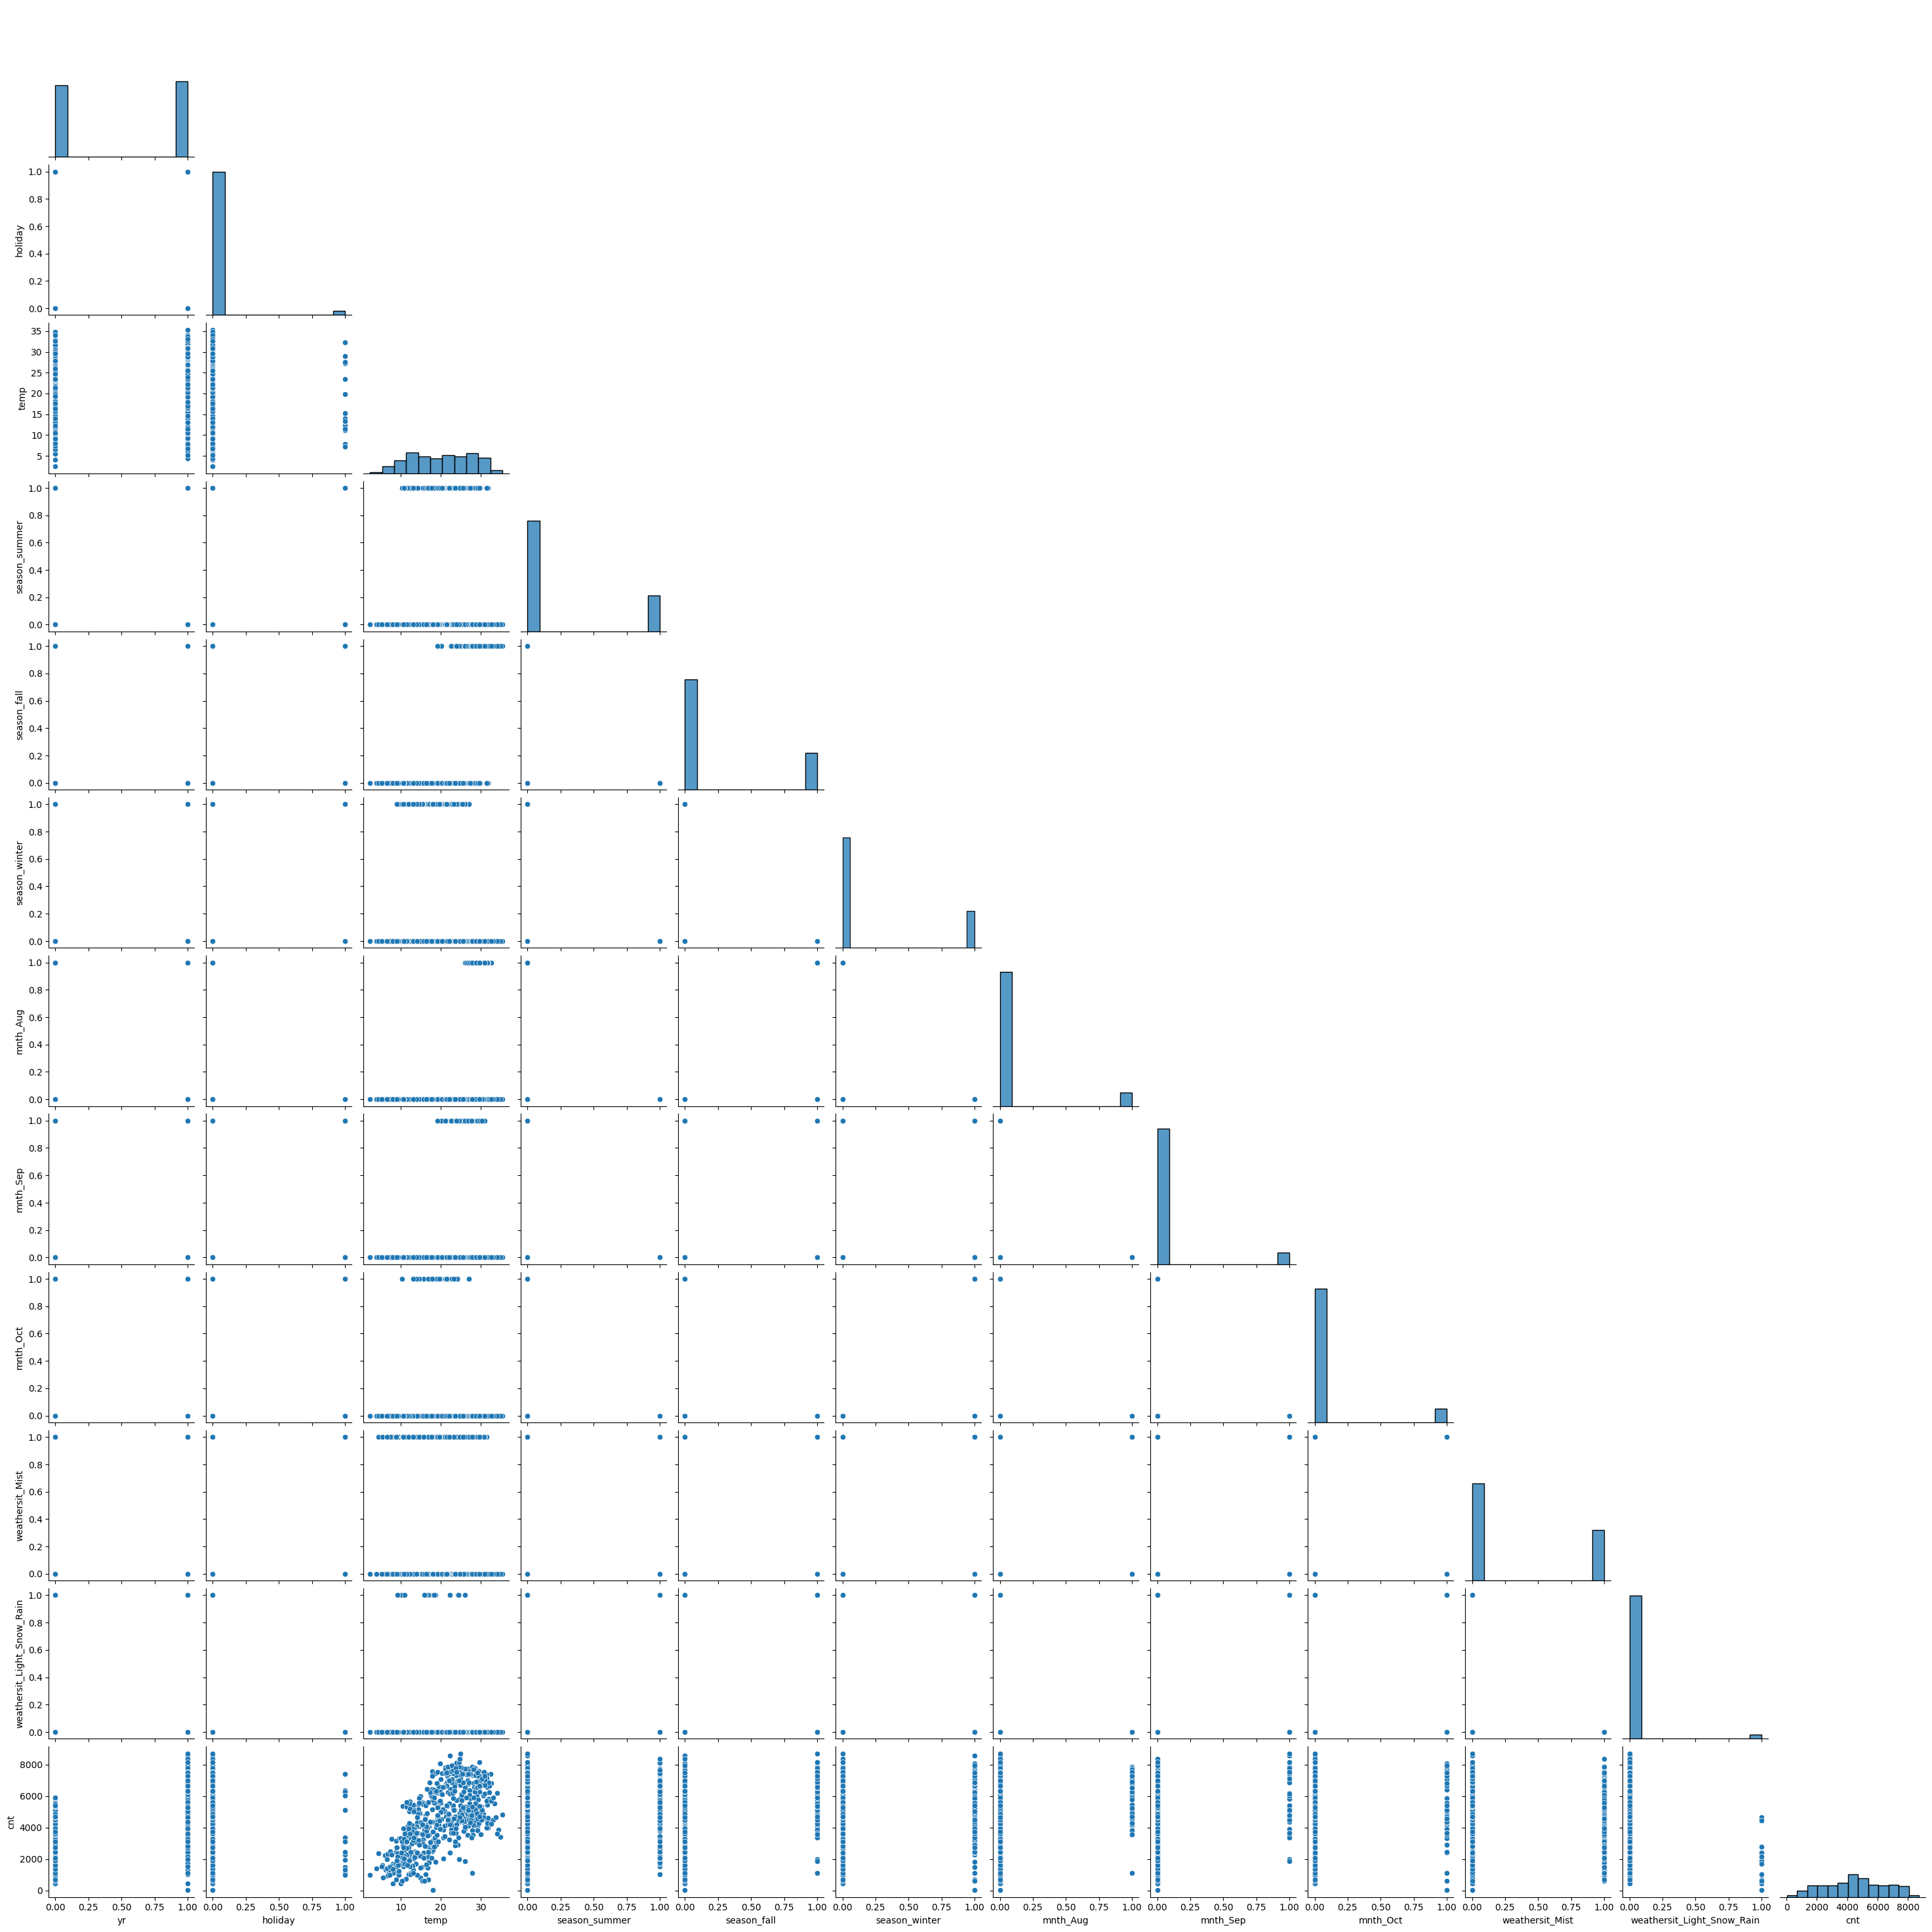

In [99]:
# Pairplot for checking linearity between each predictor and target
sns.pairplot(df_linearity, corner=True)
plt.show()

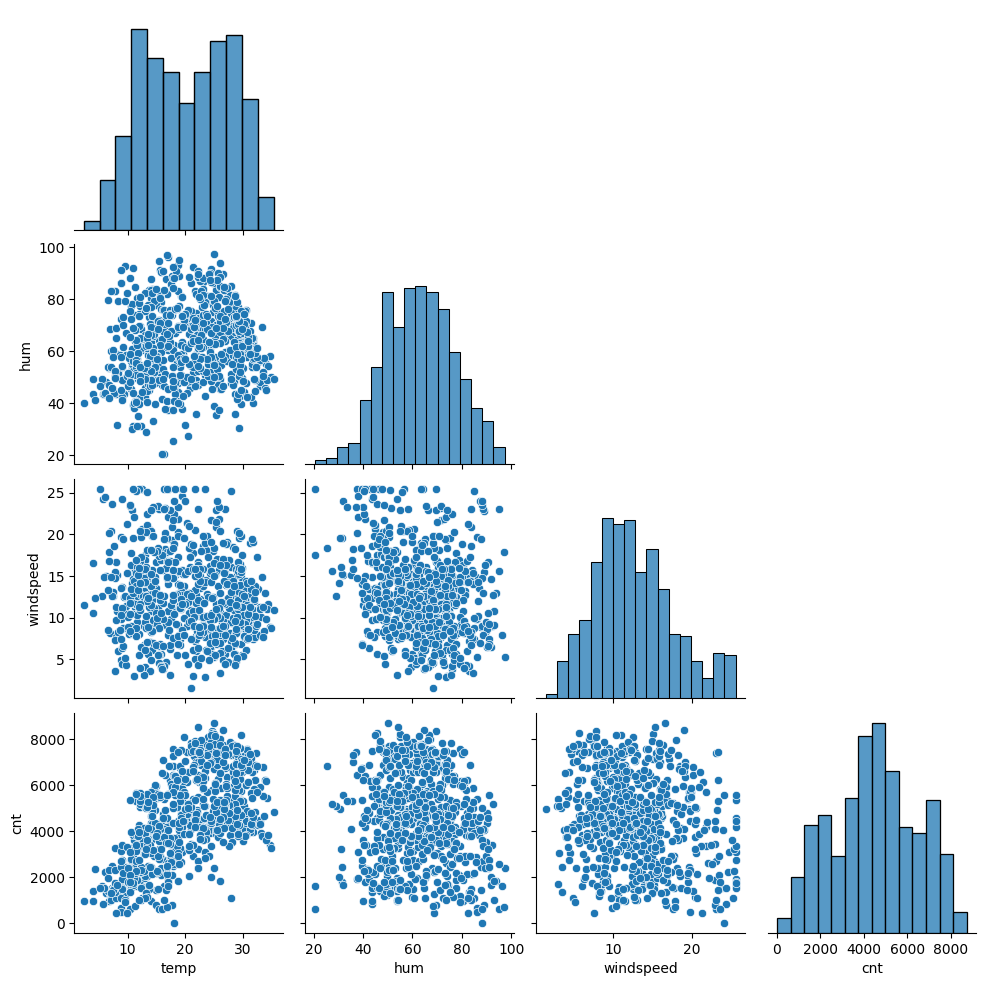

In [100]:
sns.pairplot(data=df[numerical_cols], corner=True)
plt.show()

## 5.2 Independence

To verify independence of residuals, we’ll assess the residuals using a residuals vs. fitted values plot and the Durbin-Watson test.

### 5.2.1 Residuals vs. Fitted Values Plot

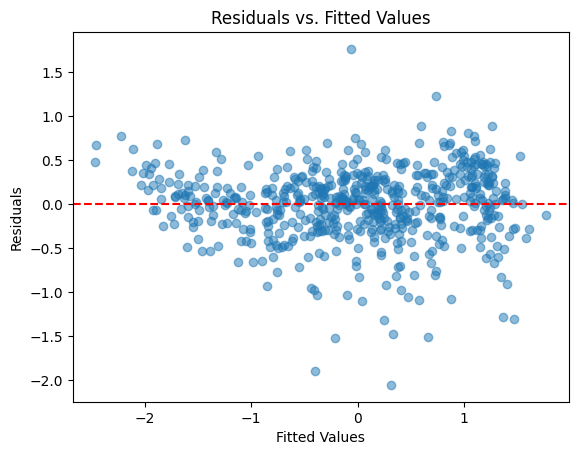

In [101]:
import matplotlib.pyplot as plt

# Calculate residuals and fitted values from model_4
fitted_values = model_4.fittedvalues
residuals = model_4.resid

# Plot residuals vs. fitted values
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


### 5.2.2 Durbin-Watson Test

In [102]:
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat)

Durbin-Watson Statistic: 2.0505852406971736


- **Residuals vs. Fitted Plot:** Random scattered points around the zero line suggest the residuals are not showing systematic patterns, supporting the independence assumption.
- **Durbin-Watson Test:** A value close to 2 suggests little or no autocorrelation.

## 5.3 Normality of Residuals

We can check the normality of residuals using a Q-Q plot and the Shapiro-Wilk test.

### 5.3.1 Plot of Residuals

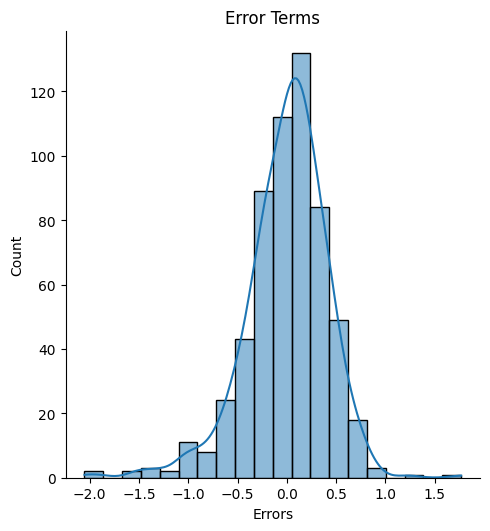

In [103]:
y_train_pred = model_4.predict(X_train_4)
sns.displot((y_train - y_train_pred), bins=20, kde=True)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

### 5.3.2 Q-Q Plot

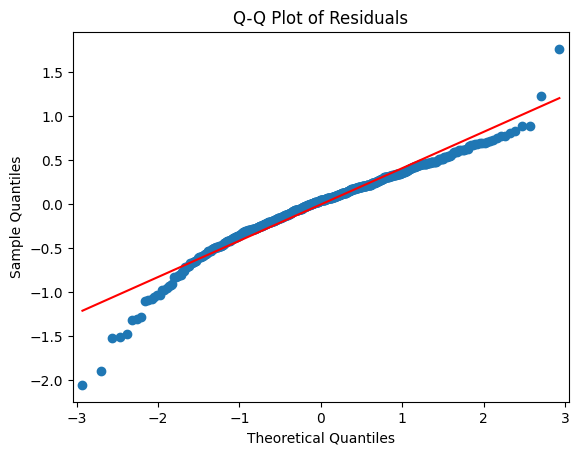

In [104]:
# Q-Q Plot for checking normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


## 5.4 Homoscedasticity

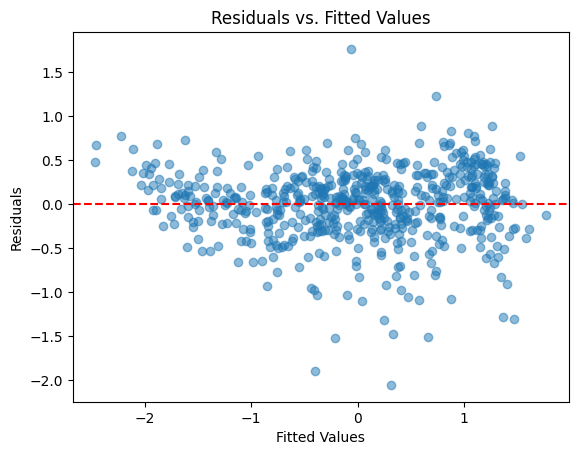

In [105]:
# Calculate residuals and fitted values from model_4
fitted_values = model_4.fittedvalues
residuals = model_4.resid

# Plot residuals vs. fitted values
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

We can check for homoscedasticity (constant variance of residuals) using a residuals vs. fitted values plot, which we did earlier, and also by performing the Breusch-Pagan test.

In [106]:
# from statsmodels.stats.diagnostic import het_breuschpagan

# # Perform the Breusch-Pagan test
# bp_test = het_breuschpagan(residuals, model_4.model.exog)
# bp_test_results = dict(zip(['LM Stat', 'LM p-value', 'F Stat', 'F p-value'], bp_test))
# print(bp_test_results)

# if bp_test_results['LM p-value'] < 0.05:
#     print("Heteroscedasticity detected")
# else:
#     print("No heteroscedasticity detected")


## 5.5 MultiCollinearity

In [107]:
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     253.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.28e-211
Time:                        16:51:10   Log-Likelihood:                -311.74
No. Observations:                 584   AIC:                             647.5
Df Residuals:                     572   BIC:                             699.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [108]:
vif_4 = udf_calculate_vif(X_train_4)
print(vif_4)

                       Feature   VIF
4                  season_fall 3.421
2                         temp 2.009
5                season_winter 2.001
6                     mnth_Aug 1.813
0                           yr 1.788
8                     mnth_Oct 1.699
9              weathersit_Mist 1.537
3                season_summer 1.500
7                     mnth_Sep 1.469
10  weathersit_Light_Snow_Rain 1.074
1                      holiday 1.035


# 6. OBSERVATIONS

## Dataset Based Observations

### 6.1 Analysis of Categorical Variables and Their Effect on the Dependent Variable

- **Season**: Higher demand seen during Summer/Fall and lower in Spring/Winter due to weather/temperature.
- **Weather Conditions**: Clear days see increased demand, whereas rainy or snowy conditions see reduced usage.
- **Holiday/Weekday**: Demand seems to be lower on holidays or weekends than weekdays when commuters need bikes

### 6.2 Importance of drop_first=True in Dummy Variable Creation
- Using drop_first=True during dummy variable creation avoids multicollinearity by omitting one of the categories for each categorical variable. This results in creating (n − 1) dummy variables for an n-category variable. This helps avoid redundancy.

### 6.3 Highest Correlation in Pair-Plot
- Looking at the Pairplot, `temp`/`atemp` seemed to have the highest correlation with target variable `cnt` at 0.63.
- We dropped `atemp` due to high collinearity with `temp`
- Afterwards, in the encoded dataframe, `temp` vs `cnt` correlation was 0.65

### 6.4 Assumptions of Linear Regression
1. Linearity
- - Temperature ('temp') shows a relatively linear relationship with the target variable ('cnt')
- - Other variables are binary/categorical, so linearity is not applicable to them
- - Observation: The linearity assumption appears to be reasonably satisfied for the continuous predictor variable.
2. Independence
- - The residuals vs. fitted values plot (Image 3) shows a fairly random scatter around zero
- - Durbin-Watson statistic is 2.05, very close to the ideal value of 2
- - Observation: The independence assumption is well satisfied, indicating no significant autocorrelation in the residuals.
3. Normality of Residuals
- - Error terms (Residuals) histogram shows an approximately normal distribution with a slight right skew
- - Q-Q plot shows: Good alignment with the theoretical line in the middle. Some deviation at the tails, particularly at the extremes.
- - Observation: The normality assumption is satisfied. There are some deviations from normality at the extremes, but not severe enough to invalidate the model.
4. Homoscedasticity
- The residuals vs. fitted values plot shows random and consistent spread of points ensuring Homoscedasticity
5. Multicollinearity
- - All VIF values are below 5 (highest is 3.42 for season_fall)
- - Most variables have VIF < 2
- - Observation: The multicollinearity assumption is satisfied, indicating no serious correlation between predictor variables.

### 6.5 Top 3 features contributing significantly towards explaining the demand of the shared bikes

To identify the most significant features, we should look at:
1. Absolute coefficient value (magnitude of impact)
2. t-statistic (strength of significance)
3. p-value (statistical significance)
4. VIF (multicollinearity check)

Let's rank the features by their t-statistics (absolute values):

1. **yr**
   - |t-stat|: 29.490 (highest)
   - Coefficient: 1.0249
   - p-value: 0.000
   - VIF: 1.788

2. **temp**
   - |t-stat|: 15.098
   - Coefficient: 0.4866
   - p-value: 0.000
   - VIF: 2.009

3. **weathersit_Light_Snow_Rain**
   - |t-stat|: 12.815
   - Coefficient: -1.3856
   - p-value: 0.000
   - VIF: 1.074

These three features are the most significant because they:
- Have the highest absolute t-statistics
- Are all highly significant (p < 0.001)
- Have acceptable VIF values (< 5)
- Have substantial coefficient values

The relative importance shows:
- Year has the strongest statistical relationship. Bike sharing grew in popularity year over year
- Temperature has the second strongest relationship. Temperature directly affects cycling comfort and feasibility
- Light snow/rain has the third strongest relationship. Precipitation significantly impacts cycling conditions
